In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd

In [2]:
def heat_map(data):
    
    ax = sns.heatmap(data, linewidth=0.5,  cmap="RdBu_r")
    plt.show()

In [152]:
# [[ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.]
#  [ 1. 11. 21. 31. 41. 51. 61. 71. 81. 91.]
#  [ 2. 12. 22. 32. 42. 52. 62. 72. 82. 92.]
#  [ 3. 13. 23. 33. 43. 53. 63. 73. 83. 93.]
#  [ 4. 14. 24. 34. 44. 54. 64. 74. 84. 94.]
#  [ 5. 15. 25. 35. 45. 55. 65. 75. 85. 95.]
#  [ 6. 16. 26. 36. 46. 56. 66. 76. 86. 96.]
#  [ 7. 17. 27. 37. 47. 57. 67. 77. 87. 97.]
#  [ 8. 18. 28. 38. 48. 58. 68. 78. 88. 98.]
#  [ 9. 19. 29. 39. 49. 59. 69. 79. 89. 99.]]


reward_function_2 = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, -100.0, -100.0, -100.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, -100.0, 0.0, -100.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, -100.0, 0.0, -100.0, -100.0, -100.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, -100.0, 0.0, 0.0, 0.0, -100.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, -100.0, 0.0, 0.0, 0.0, -100.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, -100.0, 0.0, 0.0, 0.0, -100.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -100.0, -100.0, -100.0, 0.0],         
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -100.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]])

reward_function_1 = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],         
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])


# heat_map(reward_function_2)

In [4]:
def map_to_matrix(m, rows, cols):
    matrix = np.zeros((rows, cols))
    
    for key in m:
        matrix[key%10, key//10] = m[key]
        
    return matrix

# Question 1 - Heatmap of the reward function

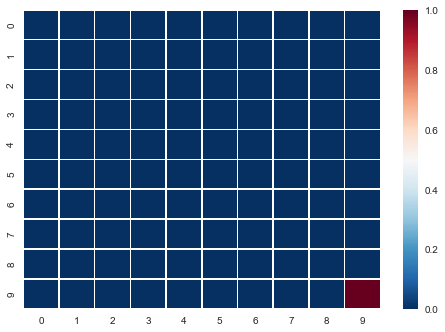

In [5]:
heat_map(reward_function_1)

# Question 2 - Implementing Value Iteration

In [6]:
#Creating the Environment

#4 types of actions possible (up, left, right, down)
left = 0
up = 1
right = 2
down = 3

actions = [left, up, right, down]

#Number of states: 100 (is a 10x10 grid, each cell representing a state numbered column wise)
grid = np.empty([10, 10])
state = 0
for column in range(0,10):
    for row in range(0,10):
        grid[row][column] = state
        state += 1


#Transition Probabilties
shape = (100, 100, 4)
#transition_prob = np.zeros(shape)

def build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down):

    for end in (neighbor_left, neighbor_up, neighbor_right, neighbor_down):
        for action in actions:

            transition_prob[start, end, action] += w/4

            if (action == down) and (end == neighbor_down):
                transition_prob[start, end, action] += 1-w

            elif (action == up) and (end == neighbor_up):
                transition_prob[start, end, action] += 1-w

            elif (action == left) and (end == neighbor_left):
                transition_prob[start, end, action] += 1-w

            elif (action == right) and (end == neighbor_right):
                transition_prob[start, end, action] += 1-w
                
    return transition_prob



def build_transition_probability_matrix(w):
    transition_prob = np.zeros([100,100,4])

    #Inner states
    for i in range(1,9):
        for j in range(1,9):
            start = j*10 + i

            neighbor_left = start-10
            neighbor_up = start-1
            neighbor_right = start+10
            neighbor_down = start+1

            transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)
        
        
    #Top Edge
    for i in [0]:
        for j in range(1,9):
            start = j*10 + i

            neighbor_left = start-10
            neighbor_up = start
            neighbor_right = start+10
            neighbor_down = start+1

            transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)

            
    #Right Edge
    for i in range(1,9):
        for j in [9]:
            start = j*10 + i

            neighbor_left = start-10
            neighbor_up = start-1
            neighbor_right = start
            neighbor_down = start+1

            transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)

            
    #Bottom edge
    for i in [9]:
        for j in range(1,9):
            start = j*10 + i

            neighbor_left = start-10
            neighbor_up = start-1
            neighbor_right = start+10
            neighbor_down = start

            transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)
    
    
    #Left edge
    for i in range(1,9):
        for j in [0]:
            start = j*10 + i

            neighbor_left = start
            neighbor_up = start-1
            neighbor_right = start+10
            neighbor_down = start+1

            transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)

            
    #Corner states
    i = 0
    j = 0
    start = j*10 + i

    neighbor_left = start
    neighbor_up = start
    neighbor_right = start+10
    neighbor_down = start+1
    transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)
    transition_prob[start,start,up] -= 1-w
    transition_prob[start,start,left] -= 1-w
    
    
    i = 0
    j = 9
    start = j*10 + i

    neighbor_left = start-10
    neighbor_up = start
    neighbor_right = start
    neighbor_down = start+1
    transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)
    transition_prob[start,start,up] -= 1-w
    transition_prob[start,start,right] -= 1-w
    
    
    i = 9
    j = 9
    start = j*10 + i

    neighbor_left = start-10
    neighbor_up = start-1
    neighbor_right = start
    neighbor_down = start
    transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)
    transition_prob[start,start,down] -= 1-w
    transition_prob[start,start,right] -= 1-w
    
    
    i = 9
    j = 0
    start = j*10 + i

    neighbor_left = start
    neighbor_up = start-1
    neighbor_right = start+10
    neighbor_down = start
    transition_prob = build_transition_probability_matrix_helper(w, transition_prob, i, j, start, neighbor_left, neighbor_up, neighbor_right, neighbor_down)
    transition_prob[start,start,left] -= 1-w
    transition_prob[start,start,down] -= 1-w
    
    return transition_prob        


In [7]:
transition_prob = build_transition_probability_matrix(0.1)

In [8]:
transition_prob.shape

(100, 100, 4)

In [91]:
#Parallel Implementation

def Value_Iteration2(transition_prob, discount, actions,epsilon, reward):
    
    V = np.zeros([100])
    
    reward = np.transpose(reward).reshape(100)
    V_old = np.zeros([100])
    V_new = np.zeros([100])

    delta = float('inf')
    while delta > epsilon:
        
#         print(delta)
        delta = 0
        V_old = V_new
        V_new = np.zeros([100])
        
        for state in range(100):
            
            #v = V[state]
            temp = []
            
            for action in actions:
                
                neighbor_left = state-10
                neighbor_up = state-1
                neighbor_right = state+10
                neighbor_down = state+1
                
                sum_values = 0
                
                neighbors = [state, neighbor_left, neighbor_up, neighbor_right, neighbor_down]  
                
                for neighbor in neighbors:
                    if (neighbor < 0) or (neighbor > 99):
                        continue
                        
                    sum_values += (transition_prob[state, neighbor, action] * (reward[neighbor] + discount * V_old[neighbor]))  
                    
                temp.append(sum_values)
                
            V_new[state] = max(temp)
            
            delta = max(delta, abs(V_old[state] - V_new[state]))            
        
    return np.transpose(V_new.reshape(10,10))


In [92]:
expertV1 = Value_Iteration2(transition_prob, 0.8, actions, 0.01, reward_function_1)

In [93]:
expertV1

array([[0.0442397 , 0.06457398, 0.09118409, 0.12504106, 0.16807826,
        0.22269335, 0.29198796, 0.37988042, 0.49134892, 0.61001145],
       [0.06457398, 0.08833385, 0.12185345, 0.16476116, 0.21945345,
        0.28917752, 0.37804302, 0.49122817, 0.63338372, 0.78751905],
       [0.09118409, 0.12185345, 0.16458987, 0.21930412, 0.28906986,
        0.3779887 , 0.49131731, 0.63565109, 0.81751608, 1.01875794],
       [0.12504106, 0.16476116, 0.21930412, 0.28906536, 0.37798653,
        0.49132035, 0.63576137, 0.81977022, 1.05235181, 1.31521922],
       [0.16807826, 0.21945345, 0.28906986, 0.37798653, 0.49132036,
        0.63576402, 0.81985582, 1.05442573, 1.35173221, 1.69523349],
       [0.22269335, 0.28917752, 0.3779887 , 0.49132035, 0.63576402,
        0.81985701, 1.05448231, 1.35348475, 1.73334073, 2.18239181],
       [0.29198796, 0.37804302, 0.49131731, 0.63576137, 0.81985582,
        1.05448231, 1.3535115 , 1.73462151, 2.21968743, 2.80696303],
       [0.37988042, 0.49122817, 0.6356510

In [94]:
optimal_values = np.empty([10, 10])
state = 0
for row in range(0,10):
    for column in range(0,10):
        optimal_values[row][column] = round(expertV1[row,column],2)
        

print(optimal_values)

[[0.04 0.06 0.09 0.13 0.17 0.22 0.29 0.38 0.49 0.61]
 [0.06 0.09 0.12 0.16 0.22 0.29 0.38 0.49 0.63 0.79]
 [0.09 0.12 0.16 0.22 0.29 0.38 0.49 0.64 0.82 1.02]
 [0.13 0.16 0.22 0.29 0.38 0.49 0.64 0.82 1.05 1.32]
 [0.17 0.22 0.29 0.38 0.49 0.64 0.82 1.05 1.35 1.7 ]
 [0.22 0.29 0.38 0.49 0.64 0.82 1.05 1.35 1.73 2.18]
 [0.29 0.38 0.49 0.64 0.82 1.05 1.35 1.73 2.22 2.81]
 [0.38 0.49 0.64 0.82 1.05 1.35 1.73 2.22 2.84 3.61]
 [0.49 0.63 0.82 1.05 1.35 1.73 2.22 2.84 3.63 4.63]
 [0.61 0.79 1.02 1.32 1.7  2.18 2.81 3.61 4.63 4.7 ]]


In [95]:
pd.DataFrame(optimal_values)

,0,1,2,3,4,5,6,7,8,9
0,0.04,0.06,0.09,0.13,0.17,0.22,0.29,0.38,0.49,0.61
1,0.06,0.09,0.12,0.16,0.22,0.29,0.38,0.49,0.63,0.79
2,0.09,0.12,0.16,0.22,0.29,0.38,0.49,0.64,0.82,1.02
3,0.13,0.16,0.22,0.29,0.38,0.49,0.64,0.82,1.05,1.32
4,0.17,0.22,0.29,0.38,0.49,0.64,0.82,1.05,1.35,1.70
5,0.22,0.29,0.38,0.49,0.64,0.82,1.05,1.35,1.73,2.18
6,0.29,0.38,0.49,0.64,0.82,1.05,1.35,1.73,2.22,2.81
7,0.38,0.49,0.64,0.82,1.05,1.35,1.73,2.22,2.84,3.61
8,0.49,0.63,0.82,1.05,1.35,1.73,2.22,2.84,3.63,4.63
9,0.61,0.79,1.02,1.32,1.70,2.18,2.81,3.61,4.63,4.70


# Question 3 - Heatmap of the optimal values of states

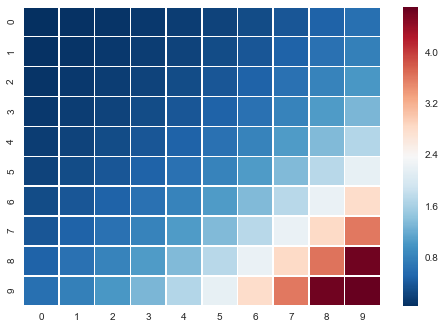

In [96]:
heat_map(expertV1)

# Question 5 - Computation step of Value Iteration

In [122]:
#Parallel Implementation with no fixes

def Value_Iteration_with_computation2(transition_prob, discount, actions, epsilon, reward):
    
    V = np.zeros([100])
    
    reward = np.transpose(reward).reshape(100)
    V_old = np.zeros([100])
    V_new = np.zeros([100])

    delta = float('inf')
    while delta > epsilon:
        
#         print(delta)
        delta = 0
        V_old = V_new
        V_new = np.zeros([100])
        
        for state in range(100):
            
            #v = V[state]
            temp = []
            
            for action in actions:
                
                neighbor_left = state-10
                neighbor_up = state-1
                neighbor_right = state+10
                neighbor_down = state+1
                
                sum_values = 0
                
                neighbors = [state, neighbor_left, neighbor_up, neighbor_right, neighbor_down]               
                for neighbor in neighbors:
                    if (neighbor < 0) or (neighbor > 99):
                        continue
                        
                    sum_values += (transition_prob[state, neighbor, action] * (reward[neighbor] + discount * V_old[neighbor]))  
                    
                temp.append(sum_values)
                
            V_new[state] = max(temp)
            
            delta = max(delta, abs(V_old[state] - V_new[state]))        
        
#     return np.transpose(V_new.reshape(10,10))

    V = V_new
    Pi = np.zeros([100])

    for state in range(100):
       
        temp = []
        for action in actions:

            neighbor_left = state-10
            neighbor_up = state-1
            neighbor_right = state+10
            neighbor_down = state+1

            sum_values = 0

            neighbors = [state, neighbor_left, neighbor_up, neighbor_right, neighbor_down]               
            for neighbor in neighbors:
                if (neighbor < 0) or (neighbor > 99):
                    continue
                sum_values += (transition_prob[state, neighbor, action] * (reward[neighbor] + discount * V[neighbor]))

            temp.append(sum_values)

        Pi[state] = np.argmax(temp)

    return np.transpose(V.reshape(10,10)), np.transpose(Pi.reshape(10,10))

In [97]:
# #Parallel Implementation with actions going outside the grid fixed 

def Value_Iteration_with_computation2(transition_prob, discount, actions, epsilon, reward):
    
    V = np.zeros([100])
    
    reward = np.transpose(reward).reshape(100)
    V_old = np.zeros([100])
    V_new = np.zeros([100])

    delta = float('inf')
    while delta > epsilon:
        
#         print(delta)
        delta = 0
        V_old = V_new
        V_new = np.zeros([100])
        
        for state in range(100):
            
            #v = V[state]
            temp = []
            
            for action in actions:
                
                neighbor_left = state-10
                neighbor_up = state-1
                neighbor_right = state+10
                neighbor_down = state+1
                
                sum_values = 0
                
                neighbors = [state, neighbor_left, neighbor_up, neighbor_right, neighbor_down]               
                for neighbor in neighbors:
                    if (neighbor < 0) or (neighbor > 99):
                        continue
                        
                    sum_values += (transition_prob[state, neighbor, action] * (reward[neighbor] + discount * V_old[neighbor]))  
                    
                temp.append(sum_values)
                
            V_new[state] = max(temp)
            
            delta = max(delta, abs(V_old[state] - V_new[state]))        
        
#     return np.transpose(V_new.reshape(10,10))

    V = V_new
    Pi = np.zeros([100])

    for state in range(100):
       
        temp = []
        for action in actions:

            neighbor_left = state-10
            neighbor_up = state-1
            neighbor_right = state+10
            neighbor_down = state+1

            sum_values = 0

            neighbors = [state, neighbor_left, neighbor_up, neighbor_right, neighbor_down]               
            for neighbor in neighbors:
                if (neighbor < 0) or (neighbor > 99):
                    continue
                sum_values += (transition_prob[state, neighbor, action] * (reward[neighbor] + discount * V[neighbor]))

            temp.append(sum_values)

            
        #Check if the action taken leads us outside the grid        
        index = np.argmax(temp)
        
       # print(temp)
        l = []
        for val in temp:
            l.append(val)
        
        l.sort()
        
        #Get the index of second largest action
        new_index = temp.index(l[-2])
        
        #Check if the state is on the left edge and action is left
        if state in range(0,10) and index == 0:
            
            if state == 0:
                if new_index == 1 or new_index == 0:
                    new_index = temp.index(l[-3])
                         
            if state == 9:
                if new_index == 3 or new_index == 0:
                    new_index = temp.index(l[-3])
            
            Pi[state] = new_index
        
        
        #Check if the state is on the upper edge and action is up
        elif state in np.arange(0,100,10) and index == 1:
            
            if state == 0:
                if new_index == 1 or new_index == 0:
                    new_index = temp.index(l[-3])
                         
            if state == 90:
                if new_index == 1 or new_index == 2:
                    new_index = temp.index(l[-3])
            
            Pi[state] = new_index    
           
        
        #Check if the state is on the right edge and action is right 
        elif state in np.arange(90,100,1) and index == 2:
            
            if state == 90:
                if new_index == 1 or new_index == 2:
                    new_index = temp.index(l[-3])
                         
            if state == 99:
                if new_index == 2 or new_index == 3:
                    new_index = temp.index(l[-3])
            
            Pi[state] = new_index
            
            
        #Check if the state is on the bottom edge and action is going down
        elif state in np.arange(9,109,10) and index == 3:
            
            if state == 9:
                if new_index == 1 or new_index == 2:
                    new_index = temp.index(l[-3])
                         
            if state == 99:
                if new_index == 3 or new_index == 0:
                    new_index = temp.index(l[-3])
                    
            Pi[state] = new_index
        
        else:
            Pi[state] = index
   

    return np.transpose(V.reshape(10,10)), np.transpose(Pi.reshape(10,10))

In [123]:
def going_out(state, action):
    if state == 0 and (action == 0 or action ==1):
        return True
    elif state == 9 and (action == 0 or action ==3):
        return True
    elif state == 90 and (action == 1 or action ==2):
        return True
    elif state in range(1,9) and action == 0:
        return True
    elif state in np.arange(10,90,10) and action == 1:
        return True
    elif state in np.arange(91,99,1) and action == 2:
        return True
    elif state in np.arange(19,99,10) and action == 3:
        return True
    else:
        return False

    
def deadlock(state, action, Pi):
    
    neighbor_left = state-10
    neighbor_up = state-1
    neighbor_right = state+10
    neighbor_down = state+1
    
    if action == 0 or action ==1:
        if state == 0 or state == 99:
            return False
        
        elif neighbor_left < 0:
            if action == 1 and Pi[neighbor_up] == 3:
                return True 
            
        elif neighbor_up < 0:
            if action == 0 and Pi[neighbor_left] == 2:
                return True 
        
        else:
            if action == 0 and Pi[neighbor_left] == 2:
                return True
            elif action == 1 and Pi[neighbor_up] == 3:
                return True          
   
    return False


In [124]:
# #Parallel Implementation with actions going outside the grid and deadlock fixed 

def Value_Iteration_with_computation2(transition_prob, discount, actions, epsilon, reward):
    
    V = np.zeros([100])
    
    reward = np.transpose(reward).reshape(100)
    V_old = np.zeros([100])
    V_new = np.zeros([100])
    
                
    delta = float('inf')
    while delta > epsilon:
        
#         print(delta)
        delta = 0
        V_old = V_new
        V_new = np.zeros([100])
        
        for state in range(100):
            
            #v = V[state]
            temp = []
            
            for action in actions:
                
                neighbor_left = state-10
                neighbor_up = state-1
                neighbor_right = state+10
                neighbor_down = state+1
                
                sum_values = 0
                
                neighbors = [state, neighbor_left, neighbor_up, neighbor_right, neighbor_down]               
                for neighbor in neighbors:
                    if (neighbor < 0) or (neighbor > 99):
                        continue
                        
                    sum_values += (transition_prob[state, neighbor, action] * (reward[neighbor] + discount * V_old[neighbor]))  
                    
                temp.append(sum_values)
                
            V_new[state] = max(temp)
            
            delta = max(delta, abs(V_old[state] - V_new[state]))        
        
#     return np.transpose(V_new.reshape(10,10))

    V = V_new
    Pi = np.zeros([100])

    for state in range(100):
       
        temp = []
        for action in actions:

            neighbor_left = state-10
            neighbor_up = state-1
            neighbor_right = state+10
            neighbor_down = state+1

            sum_values = 0

            neighbors = [state, neighbor_left, neighbor_up, neighbor_right, neighbor_down]               
            for neighbor in neighbors:
                if (neighbor < 0) or (neighbor > 99):
                    continue
                sum_values += (transition_prob[state, neighbor, action] * (reward[neighbor] + discount * V[neighbor]))

            temp.append(sum_values)

            
        #Check if the action taken leads us outside the grid        
        index = np.argmax(temp)
        
        action_order = sorted(range(len(temp)), key=lambda k: -temp[k])
        
        chosen_action = -1
        
        for act in action_order:
            if not going_out(state, act) and not deadlock(state, act, Pi):
                chosen_action = act
                break
        
        Pi[state] = chosen_action
              
    return np.transpose(V.reshape(10,10)), np.transpose(Pi.reshape(10,10))

In [126]:
expertV1, expertPi1 = Value_Iteration_with_computation2(transition_prob, 0.8, actions, 0.01, reward_function_1)

In [127]:
expert_optimal_actions_1 = expertPi1
expert_optimal_actions_1

array([[3., 2., 2., 2., 2., 2., 2., 2., 3., 3.],
       [3., 2., 2., 2., 2., 2., 3., 3., 3., 3.],
       [3., 3., 3., 2., 2., 3., 3., 3., 3., 3.],
       [3., 3., 3., 2., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 2., 2., 3., 3., 3., 3., 3.],
       [3., 3., 2., 2., 2., 2., 3., 3., 3., 3.],
       [3., 2., 2., 2., 2., 2., 3., 3., 3., 3.],
       [3., 2., 2., 2., 2., 2., 2., 2., 3., 3.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 3.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [128]:
def matrix_to_arrows(matrix):
    arrows = matrix.tolist()
    
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i, j] == 0:
                arrows[i][j] = u'\N{LEFTWARDS ARROW}'
                
            if matrix[i, j] == 1:
                arrows[i][j] = u'\N{UPWARDS ARROW}'
                
            if matrix[i, j] == 2:
                arrows[i][j] = u'\N{RIGHTWARDS ARROW}'
                
            if matrix[i, j] == 3:
                arrows[i][j] = u'\N{DOWNWARDS ARROW}'
                
    return arrows

In [129]:
import pandas as pd

expert_optimal_arrows_1 = matrix_to_arrows(expert_optimal_actions_1)
pd.DataFrame(expert_optimal_arrows_1)

,0,1,2,3,4,5,6,7,8,9
0,↓,→,→,→,→,→,→,→,↓,↓
1,↓,→,→,→,→,→,↓,↓,↓,↓
2,↓,↓,↓,→,→,↓,↓,↓,↓,↓
3,↓,↓,↓,→,↓,↓,↓,↓,↓,↓
4,↓,↓,↓,→,→,↓,↓,↓,↓,↓
5,↓,↓,→,→,→,→,↓,↓,↓,↓
6,↓,→,→,→,→,→,↓,↓,↓,↓
7,↓,→,→,→,→,→,→,→,↓,↓
8,→,→,→,→,→,→,→,→,→,↓
9,→,→,→,→,→,→,→,→,→,→


# Question 5 compute using neighbors

In [118]:
def compute_optimal_actions_using_neighbors_V(V):
    V = np.transpose(V).reshape(100)

    optimal_actions_using_V = np.zeros([100])

    for i in range(1,9):
        for j in range(1, 9):
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(V[left])

            up = key - 1
            temp.append(V[up])

            right = key + 10
            temp.append(V[right])

            down = key + 1
            temp.append(V[down])

#             print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)

    for i in [0]:
        for j in range(1,9):
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(V[left])

            up = key - 1
            temp.append(float('-inf'))

            right = key + 10
            temp.append(V[right])

            down = key + 1
            temp.append(V[down])

#             print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)


    #Right Edge
    for i in range(1,9):
        for j in [9]:
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(V[left])

            up = key - 1
            temp.append(V[up])

            right = key + 10
            temp.append(float('-inf'))

            down = key + 1
            temp.append(V[down])

#             print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)


    #Bottom edge
    for i in [9]:
        for j in range(1,9):
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(V[left])

            up = key - 1
            temp.append(V[up])

            right = key + 10
            temp.append(V[right])

            down = key + 1
            temp.append(float('-inf'))

#             print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)


    #Left edge
    for i in range(1,9):
        for j in [0]:
            key = j*10 + i

            temp = []

            left = key - 10
            temp.append(float('-inf'))

            up = key - 1
            temp.append(V[up])

            right = key + 10
            temp.append(V[right])

            down = key + 1
            temp.append(V[down])

#             print(key, temp)
            optimal_actions_using_V[key] = np.argmax(temp)


    #Corner states
    i = 0
    j = 0
    key = j*10 + i

    temp = []

    left = key - 10
    temp.append(float('-inf'))

    up = key - 1
    temp.append(float('-inf'))

    right = key + 10
    temp.append(V[right])

    down = key + 1
    temp.append(V[down])

#     print(key, temp)
    optimal_actions_using_V[key] = np.argmax(temp)


    i = 0
    j = 9
    key = j*10 + i

    temp = []

    left = key - 10
    temp.append(V[left])

    up = key - 1
    temp.append(float('-inf'))

    right = key + 10
    temp.append(float('-inf'))

    down = key + 1
    temp.append(V[down])

#     print(key, temp)
    optimal_actions_using_V[key] = np.argmax(temp)


    i = 9
    j = 9
    key = j*10 + i

    temp = []

    left = key - 10
    temp.append(V[left])

    up = key - 1
    temp.append(V[up])

    right = key + 10
    temp.append(float('-inf'))

    down = key + 1
    temp.append(float('-inf'))

#     print(key, temp)
    optimal_actions_using_V[key] = np.argmax(temp)


    i = 9
    j = 0
    key = j*10 + i

    temp = []

    left = key - 10
    temp.append(float('-inf'))

    up = key - 1
    temp.append(V[up])

    right = key + 10
    temp.append(V[right])

    down = key + 1
    temp.append(float('-inf'))

#     print(key, temp)
    optimal_actions_using_V[key] = np.argmax(temp)

    # for i in range(10):
    #     for j in range(10):
    #         key = j*10 + i

    #         print(key, temp)
    #         optimal_actions_using_V[key] = np.argmax(temp)

    return optimal_actions_using_V

In [119]:
expert_optimal_actions_using_neighbors_1 = compute_optimal_actions_using_neighbors_V(expertV1)

pd.DataFrame(matrix_to_arrows(np.transpose(expert_optimal_actions_using_neighbors_1.reshape(10,10))))


,0,1,2,3,4,5,6,7,8,9
0,↓,→,→,→,→,→,→,→,↓,↓
1,↓,→,→,→,→,→,↓,↓,↓,↓
2,↓,↓,↓,→,→,↓,↓,↓,↓,↓
3,↓,↓,↓,→,↓,↓,↓,↓,↓,↓
4,↓,↓,↓,→,→,↓,↓,↓,↓,↓
5,↓,↓,→,→,→,→,↓,↓,↓,↓
6,↓,→,→,→,→,→,↓,↓,↓,↓
7,↓,→,→,→,→,→,→,→,↓,↓
8,→,→,→,→,→,→,→,→,→,↓
9,→,→,→,→,→,→,→,→,→,←


# Question 6

In [130]:
expertV2 = Value_Iteration2(transition_prob, 0.8, actions, 0.01, reward_function_2)

optimal_values = np.empty([10, 10])
state = 0
for row in range(0,10):
    for column in range(0,10):
        optimal_values[row][column] = round(expertV2[row,column],2)
        

#print(optimal_values)
pd.DataFrame(optimal_values)

,0,1,2,3,4,5,6,7,8,9
0,0.65,0.79,0.82,0.53,-2.39,-4.24,-1.92,1.13,1.59,2.03
1,0.83,1.02,1.06,-1.88,-6.75,-8.68,-6.37,-1.30,1.92,2.61
2,1.06,1.31,1.45,-1.64,-6.76,-13.92,-9.65,-5.51,-0.13,3.36
3,1.36,1.69,1.94,-1.24,-6.34,-7.98,-7.95,-9.43,-1.92,4.39
4,1.73,2.17,2.59,-0.74,-5.85,-3.26,-3.24,-7.43,1.72,9.16
5,2.21,2.78,3.41,-0.04,-5.11,-0.55,-0.49,-2.98,6.58,15.35
6,2.82,3.55,4.48,3.02,2.48,2.88,-0.47,-4.91,12.69,23.30
7,3.58,4.54,5.79,7.29,6.72,7.24,0.93,12.37,21.16,33.48
8,4.56,5.79,7.40,9.44,12.01,12.89,17.10,23.01,33.78,46.53
9,5.73,7.32,9.39,12.04,15.45,19.82,25.50,36.16,46.58,47.31


# Question 7

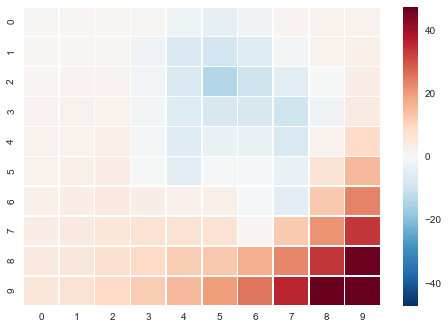

In [131]:
heat_map(optimal_values)

# Question 9 - Computation step

In [132]:
V, Pi = Value_Iteration_with_computation2(transition_prob, 0.8, actions, 0.01, reward_function_2)
expert_optimal_actions_2 = Pi

In [133]:
expert_optimal_actions_2

array([[3., 3., 3., 0., 0., 2., 2., 2., 2., 3.],
       [3., 3., 3., 0., 0., 1., 2., 2., 2., 3.],
       [3., 3., 3., 0., 0., 3., 2., 2., 2., 3.],
       [3., 3., 3., 0., 0., 3., 3., 1., 2., 3.],
       [3., 3., 3., 0., 0., 3., 3., 3., 2., 3.],
       [3., 3., 3., 0., 0., 3., 3., 0., 2., 3.],
       [3., 3., 3., 3., 3., 3., 0., 0., 2., 3.],
       [3., 3., 3., 3., 3., 3., 0., 3., 3., 3.],
       [2., 2., 2., 3., 3., 3., 3., 3., 3., 3.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [134]:
expert_optimal_arrows_2 = matrix_to_arrows(expert_optimal_actions_2)
pd.DataFrame(expert_optimal_arrows_2)

,0,1,2,3,4,5,6,7,8,9
0,↓,↓,↓,←,←,→,→,→,→,↓
1,↓,↓,↓,←,←,↑,→,→,→,↓
2,↓,↓,↓,←,←,↓,→,→,→,↓
3,↓,↓,↓,←,←,↓,↓,↑,→,↓
4,↓,↓,↓,←,←,↓,↓,↓,→,↓
5,↓,↓,↓,←,←,↓,↓,←,→,↓
6,↓,↓,↓,↓,↓,↓,←,←,→,↓
7,↓,↓,↓,↓,↓,↓,←,↓,↓,↓
8,→,→,→,↓,↓,↓,↓,↓,↓,↓
9,→,→,→,→,→,→,→,→,→,→


# Question 11

In [135]:
def fill_identity_matrix(D, dimension, row, col, factor):
    D[row:row+dimension, col:col+dimension] = factor * np.identity(dimension)
    
    return D

In [136]:
def find_Rmax(reward_function):
    
    abs_reward = abs(reward_function)
    return np.max(abs_reward)

In [137]:
from cvxopt import matrix, solvers
#solvers.options['show_progress'] = False

def compute_solver(lamda, reward_function, expert_optimal_actions):
    
    num_states = 100
    num_actions = len(actions)
    discount = 0.8

    #Dimension of D is 1000 x 300
    D = np.zeros([num_states * (num_actions - 1) * 2 + num_states * 4, num_states * 3])

    #Dimension of X is 300 x 1
    X = np.zeros([num_states * 3])

    #Dimension of C is 300 x 1
    C = np.zeros([num_states * 3])

    #Dimension of B is 1000x1
    B = np.zeros([1000, 1])

    
    #Filling the D matrix

    for i in range(10):    
        for j in range(10):
            state = j*10+i

            optimal_action = int(expert_optimal_actions[i][j])
        
            first_inv = np.linalg.inv(np.eye(num_states) - discount * transition_prob[:, :, optimal_action])

            count = 0

            for action in range(num_actions):

                if action != optimal_action:

                    D[state * (num_actions - 1) + count, 0:num_states] = - (np.dot(transition_prob[state, :, optimal_action] - transition_prob[state, :, action], first_inv))

                    D[state * (num_actions - 1) + count, num_states + state] = 1

                    D[num_states * (num_actions - 1) + state * (num_actions - 1) + count, 0:num_states] = - (np.dot(transition_prob[state, :, optimal_action] - transition_prob[state, :, action], first_inv))

                    count += 1

    D = fill_identity_matrix(D, 100, 600, 0, -1)
    D = fill_identity_matrix(D, 100, 700, 0, 1)
    D = fill_identity_matrix(D, 100, 800, 0, 1)
    D = fill_identity_matrix(D, 100, 900, 0, -1)
    D = fill_identity_matrix(D, 100, 600, 200, -1)
    D = fill_identity_matrix(D, 100, 700, 200, -1)

    Rmax = find_Rmax(reward_function)
    

    #FIlling the B matrix
    B[800:1000] = Rmax

    #Filling the C matrix

    C[100:200] = -1
    C[200:300] = lamda
    
    sol = solvers.lp(matrix(C), matrix(D), matrix(B))

    rewards = sol['x'][0:100]

    return rewards


In [138]:
def compute_accuracy(reward_function, expert_optimal_actions):
    
    max_accuracy = 0
    max_accuracy_lamda = 0
    
    accuracies = []

    lamdas = np.linspace(start=0, stop=5, num=500)
    
    for l in lamdas:
        
        solver_reward_function = np.array(compute_solver(l, reward_function, expert_optimal_actions))
        
        V, Pi = Value_Iteration_with_computation2(transition_prob, 0.8, actions, 0.01, solver_reward_function)    
        #solver_optimal_actions = compute_solver_optimal_actions(solver_reward_function)
        solver_optimal_actions = Pi

        count = 0

        for i in range(10):
            for j in range(10):
                if solver_optimal_actions[i][j] == expert_optimal_actions[i][j]:
                    count += 1

        accuracies.append(count)
        
        if max_accuracy < count:
            max_accuracy = count
            max_accuracy_lamda = l
            
    return accuracies, lamdas, max_accuracy, max_accuracy_lamda


     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  2e+01  1e+00
 1: -1.1637e+01 -1.0174e+02  4e+02  7e-01  5e+00  1e+00
 2: -2.0535e+01 -7.8964e+01  3e+02  5e-01  3e+00  7e-01
 3: -3.1169e+01 -5.9359e+01  1e+02  2e-01  2e+00  4e-01
 4: -3.7187e+01 -4.7498e+01  5e+01  8e-02  6e-01  1e-01
 5: -4.0016e+01 -4.4845e+01  2e+01  4e-02  3e-01  5e-02
 6: -4.1683e+01 -4.3278e+01  7e+00  1e-02  9e-02  1e-02
 7: -4.2241e+01 -4.3031e+01  4e+00  6e-03  5e-02  6e-03
 8: -4.2661e+01 -4.2979e+01  1e+00  3e-03  2e-02  2e-03
 9: -4.2757e+01 -4.2940e+01  8e-01  1e-03  1e-02  9e-04
10: -4.2873e+01 -4.2939e+01  3e-01  5e-04  4e-03  3e-04
11: -4.2904e+01 -4.2930e+01  1e-01  2e-04  1e-03  1e-04
12: -4.2904e+01 -4.2926e+01  1e-01  2e-04  1e-03  1e-04
13: -4.2914e+01 -4.2922e+01  4e-02  6e-05  4e-04  4e-05
14: -4.2916e+01 -4.2920e+01  2e-02  3e-05  2e-04  2e-05
15: -4.2916e+01 -4.2919e+01  1e-02  2e-05  2e-04  1e-05
16: -4.2917e+01 -4.2918e+01  6e-03  1e-05  7e-05  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  2e+01  1e+00
 1: -9.4380e+00 -9.5531e+01  4e+02  7e-01  5e+00  1e+00
 2: -1.7269e+01 -7.3698e+01  2e+02  5e-01  3e+00  7e-01
 3: -2.6723e+01 -5.5064e+01  1e+02  2e-01  2e+00  4e-01
 4: -3.1910e+01 -4.4488e+01  5e+01  1e-01  7e-01  1e-01
 5: -3.4776e+01 -4.1751e+01  3e+01  6e-02  4e-01  7e-02
 6: -3.6775e+01 -3.9913e+01  1e+01  3e-02  2e-01  3e-02
 7: -3.8164e+01 -3.9173e+01  4e+00  8e-03  6e-02  7e-03
 8: -3.8409e+01 -3.8960e+01  2e+00  4e-03  3e-02  3e-03
 9: -3.8668e+01 -3.8893e+01  9e-01  2e-03  1e-02  1e-03
10: -3.8698e+01 -3.8870e+01  7e-01  1e-03  1e-02  9e-04
11: -3.8721e+01 -3.8843e+01  5e-01  1e-03  7e-03  6e-04
12: -3.8775e+01 -3.8825e+01  2e-01  4e-04  3e-03  2e-04
13: -3.8778e+01 -3.8820e+01  2e-01  3e-04  2e-03  2e-04
14: -3.8791e+01 -3.8813e+01  9e-02  2e-04  1e-03  1e-04
15: -3.8796e+01 -3.8809e+01  6e-02  1e-04  8e-04  6e-05
16: -3.8796e+01 -3.8808e+01  5e-02  1e-04  7e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  2e+01  1e+00
 1: -7.2286e+00 -8.8808e+01  3e+02  7e-01  5e+00  1e+00
 2: -1.4041e+01 -6.8072e+01  2e+02  4e-01  3e+00  7e-01
 3: -2.2276e+01 -5.0671e+01  1e+02  2e-01  2e+00  4e-01
 4: -2.6965e+01 -4.1082e+01  6e+01  1e-01  8e-01  2e-01
 5: -3.1065e+01 -3.6384e+01  2e+01  4e-02  3e-01  5e-02
 6: -3.2543e+01 -3.5077e+01  1e+01  2e-02  1e-01  2e-02
 7: -3.3382e+01 -3.4687e+01  5e+00  1e-02  7e-02  9e-03
 8: -3.3970e+01 -3.4425e+01  2e+00  4e-03  3e-02  2e-03
 9: -3.4046e+01 -3.4357e+01  1e+00  3e-03  2e-02  1e-03
10: -3.4127e+01 -3.4314e+01  8e-01  2e-03  1e-02  8e-04
11: -3.4158e+01 -3.4291e+01  6e-01  1e-03  8e-03  6e-04
12: -3.4185e+01 -3.4270e+01  4e-01  7e-04  5e-03  4e-04
13: -3.4193e+01 -3.4268e+01  3e-01  6e-04  4e-03  3e-04
14: -3.4200e+01 -3.4256e+01  3e-01  5e-04  3e-03  2e-04
15: -3.4206e+01 -3.4243e+01  2e-01  3e-04  2e-03  2e-04
16: -3.4213e+01 -3.4228e+01  7e-02  1e-04  8e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  2e+01  1e+00
 1: -5.4565e+00 -8.2976e+01  3e+02  6e-01  4e+00  9e-01
 2: -1.1407e+01 -6.3077e+01  2e+02  4e-01  3e+00  7e-01
 3: -1.8442e+01 -4.6596e+01  1e+02  2e-01  2e+00  4e-01
 4: -2.2929e+01 -3.7240e+01  6e+01  1e-01  8e-01  2e-01
 5: -2.6595e+01 -3.2019e+01  2e+01  4e-02  3e-01  5e-02
 6: -2.8174e+01 -3.0830e+01  1e+01  2e-02  1e-01  2e-02
 7: -2.8998e+01 -3.0293e+01  5e+00  1e-02  7e-02  8e-03
 8: -2.9537e+01 -3.0044e+01  2e+00  4e-03  3e-02  3e-03
 9: -2.9566e+01 -2.9949e+01  2e+00  3e-03  2e-02  2e-03
10: -2.9629e+01 -2.9906e+01  1e+00  2e-03  2e-02  1e-03
11: -2.9677e+01 -2.9863e+01  8e-01  2e-03  1e-02  9e-04
12: -2.9694e+01 -2.9838e+01  6e-01  1e-03  8e-03  7e-04
13: -2.9704e+01 -2.9805e+01  5e-01  8e-04  6e-03  5e-04
14: -2.9703e+01 -2.9781e+01  4e-01  6e-04  4e-03  4e-04
15: -2.9719e+01 -2.9771e+01  2e-01  4e-04  3e-03  2e-04
16: -2.9730e+01 -2.9751e+01  1e-01  2e-04  1e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  2e+01  1e+00
 1: -4.1046e+00 -7.8150e+01  3e+02  6e-01  4e+00  1e+00
 2: -9.2606e+00 -5.8667e+01  2e+02  4e-01  3e+00  7e-01
 3: -1.5193e+01 -4.2259e+01  1e+02  2e-01  2e+00  3e-01
 4: -1.9517e+01 -3.2994e+01  5e+01  1e-01  8e-01  2e-01
 5: -2.2573e+01 -2.7584e+01  2e+01  4e-02  3e-01  4e-02
 6: -2.3908e+01 -2.6576e+01  1e+01  2e-02  1e-01  2e-02
 7: -2.4685e+01 -2.6107e+01  5e+00  1e-02  8e-02  1e-02
 8: -2.4970e+01 -2.5868e+01  3e+00  7e-03  5e-02  6e-03
 9: -2.5272e+01 -2.5635e+01  1e+00  3e-03  2e-02  2e-03
10: -2.5248e+01 -2.5613e+01  1e+00  3e-03  2e-02  2e-03
11: -2.5333e+01 -2.5548e+01  9e-01  2e-03  1e-02  1e-03
12: -2.5387e+01 -2.5505e+01  5e-01  1e-03  7e-03  5e-04
13: -2.5408e+01 -2.5482e+01  3e-01  6e-04  4e-03  3e-04
14: -2.5416e+01 -2.5464e+01  2e-01  4e-04  3e-03  2e-04
15: -2.5415e+01 -2.5460e+01  2e-01  4e-04  2e-03  2e-04
16: -2.5417e+01 -2.5444e+01  1e-01  2e-04  2e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  2e+01  1e+00
 1: -2.8288e+00 -7.2877e+01  3e+02  6e-01  4e+00  1e+00
 2: -7.1567e+00 -5.3803e+01  2e+02  4e-01  3e+00  7e-01
 3: -1.1612e+01 -3.7808e+01  1e+02  2e-01  1e+00  3e-01
 4: -1.5914e+01 -2.7893e+01  5e+01  1e-01  7e-01  1e-01
 5: -1.8107e+01 -2.2770e+01  2e+01  4e-02  3e-01  3e-02
 6: -1.9432e+01 -2.1652e+01  8e+00  2e-02  1e-01  1e-02
 7: -2.0052e+01 -2.1168e+01  4e+00  9e-03  6e-02  7e-03
 8: -2.0328e+01 -2.0842e+01  2e+00  4e-03  3e-02  3e-03
 9: -2.0319e+01 -2.0791e+01  2e+00  4e-03  3e-02  2e-03
10: -2.0413e+01 -2.0700e+01  1e+00  2e-03  2e-02  1e-03
11: -2.0496e+01 -2.0629e+01  6e-01  1e-03  7e-03  6e-04
12: -2.0541e+01 -2.0590e+01  2e-01  4e-04  3e-03  2e-04
13: -2.0543e+01 -2.0576e+01  1e-01  3e-04  2e-03  1e-04
14: -2.0554e+01 -2.0560e+01  3e-02  5e-05  3e-04  3e-05
15: -2.0556e+01 -2.0557e+01  5e-03  9e-06  6e-05  5e-06
16: -2.0556e+01 -2.0556e+01  8e-04  1e-06  9e-06  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.8205e+00 -6.7917e+01  2e+02  5e-01  4e+00  1e+00
 2: -5.3923e+00 -4.9136e+01  2e+02  4e-01  2e+00  7e-01
 3: -8.3272e+00 -3.4214e+01  1e+02  2e-01  1e+00  3e-01
 4: -1.2976e+01 -2.2132e+01  3e+01  7e-02  5e-01  1e-01
 5: -1.4018e+01 -1.8888e+01  2e+01  4e-02  3e-01  3e-02
 6: -1.5378e+01 -1.7194e+01  7e+00  1e-02  1e-01  1e-02
 7: -1.5873e+01 -1.6787e+01  3e+00  7e-03  5e-02  6e-03
 8: -1.5926e+01 -1.6645e+01  3e+00  6e-03  4e-02  4e-03
 9: -1.6065e+01 -1.6444e+01  1e+00  3e-03  2e-02  2e-03
10: -1.6141e+01 -1.6349e+01  8e-01  2e-03  1e-02  1e-03
11: -1.6164e+01 -1.6312e+01  6e-01  1e-03  8e-03  7e-04
12: -1.6213e+01 -1.6247e+01  1e-01  3e-04  2e-03  1e-04
13: -1.6225e+01 -1.6229e+01  2e-02  4e-05  3e-04  2e-05
14: -1.6226e+01 -1.6228e+01  6e-03  1e-05  8e-05  6e-06
15: -1.6227e+01 -1.6227e+01  7e-04  2e-06  1e-05  7e-07
16: -1.6227e+01 -1.6227e+01  9e-05  2e-07  1e-06  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  1e+01  1e+00
 1: -9.2979e-01 -6.2550e+01  2e+02  5e-01  3e+00  1e+00
 2: -3.7043e+00 -4.3940e+01  1e+02  3e-01  2e+00  7e-01
 3: -5.3193e+00 -2.9796e+01  9e+01  2e-01  1e+00  3e-01
 4: -9.0404e+00 -1.8360e+01  3e+01  8e-02  5e-01  1e-01
 5: -1.0440e+01 -1.5166e+01  2e+01  4e-02  2e-01  5e-02
 6: -1.1080e+01 -1.3791e+01  9e+00  2e-02  1e-01  3e-02
 7: -1.1683e+01 -1.2494e+01  3e+00  7e-03  4e-02  6e-03
 8: -1.1844e+01 -1.2256e+01  1e+00  3e-03  2e-02  3e-03
 9: -1.1977e+01 -1.2084e+01  4e-01  9e-04  6e-03  6e-04
10: -1.2013e+01 -1.2040e+01  9e-02  2e-04  1e-03  1e-04
11: -1.2021e+01 -1.2029e+01  2e-02  6e-05  4e-04  3e-05
12: -1.2024e+01 -1.2026e+01  7e-03  2e-05  1e-04  7e-06
13: -1.2024e+01 -1.2025e+01  2e-03  5e-06  3e-05  2e-06
14: -1.2025e+01 -1.2025e+01  4e-04  8e-07  5e-06  4e-07
15: -1.2025e+01 -1.2025e+01  5e-05  1e-07  8e-07  5e-08
16: -1.2025e+01 -1.2025e+01  6e-06  1e-08  9e-08  

 6: -7.6343e+00 -9.3006e+00  6e+00  1e-02  8e-02  1e-02
 7: -8.0197e+00 -8.6554e+00  2e+00  5e-03  3e-02  3e-03
 8: -8.1458e+00 -8.4682e+00  1e+00  3e-03  2e-02  1e-03
 9: -8.2497e+00 -8.3324e+00  3e-01  7e-04  4e-03  3e-04
10: -8.2706e+00 -8.3062e+00  1e-01  3e-04  2e-03  1e-04
11: -8.2806e+00 -8.2923e+00  4e-02  9e-05  6e-04  4e-05
12: -8.2849e+00 -8.2869e+00  7e-03  2e-05  1e-04  7e-06
13: -8.2856e+00 -8.2860e+00  1e-03  3e-06  2e-05  1e-06
14: -8.2857e+00 -8.2858e+00  2e-04  4e-07  2e-06  2e-07
15: -8.2857e+00 -8.2857e+00  2e-05  5e-08  3e-07  2e-08
16: -8.2857e+00 -8.2857e+00  4e-06  9e-09  6e-08  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  1e+01  1e+00
 1: -1.8304e-01 -5.8489e+01  2e+02  5e-01  3e+00  1e+00
 2: -2.1562e+00 -3.8614e+01  1e+02  3e-01  2e+00  6e-01
 3: -2.7216e+00 -2.4538e+01  8e+01  2e-01  1e+00  3e-01
 4: -5.7010e+00 -1.3150e+01  2e+01  6e-02  4e-01  1e-01
 5: -6.6493e+00 -1.0546e+0

 4: -3.1580e+00 -1.0066e+01  2e+01  6e-02  3e-01  8e-02
 5: -4.0549e+00 -6.8112e+00  8e+00  2e-02  1e-01  3e-02
 6: -4.4721e+00 -5.4944e+00  3e+00  8e-03  5e-02  8e-03
 7: -4.5939e+00 -5.1616e+00  2e+00  5e-03  3e-02  4e-03
 8: -4.6671e+00 -4.9605e+00  9e-01  2e-03  1e-02  2e-03
 9: -4.7096e+00 -4.8612e+00  5e-01  1e-03  7e-03  8e-04
10: -4.7465e+00 -4.7944e+00  1e-01  4e-04  2e-03  2e-04
11: -4.7564e+00 -4.7748e+00  5e-02  1e-04  9e-04  7e-05
12: -4.7619e+00 -4.7647e+00  8e-03  2e-05  1e-04  1e-05
13: -4.7624e+00 -4.7635e+00  3e-03  8e-06  5e-05  4e-06
14: -4.7627e+00 -4.7628e+00  4e-04  1e-06  6e-06  4e-07
15: -4.7628e+00 -4.7628e+00  5e-05  1e-07  8e-07  5e-08
16: -4.7628e+00 -4.7628e+00  9e-06  2e-08  1e-07  9e-09
17: -4.7628e+00 -4.7628e+00  4e-06  1e-08  7e-08  4e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  1e+01  1e+00
 1:  3.5084e-01 -5.8351e+01  2e+02  5e-01  3e+00  1e+00
 2: -9.4907e-01 -3.3934e+0

 2: -1.6630e-01 -2.9827e+01  1e+02  2e-01  1e+00  5e-01
 3:  2.0115e-01 -1.4675e+01  5e+01  1e-01  7e-01  2e-01
 4: -1.4795e+00 -6.8606e+00  2e+01  4e-02  3e-01  6e-02
 5: -1.9520e+00 -4.2981e+00  6e+00  2e-02  1e-01  2e-02
 6: -2.2058e+00 -3.5559e+00  4e+00  1e-02  6e-02  1e-02
 7: -2.4369e+00 -2.9235e+00  1e+00  4e-03  2e-02  3e-03
 8: -2.4967e+00 -2.7086e+00  6e-01  2e-03  1e-02  1e-03
 9: -2.5298e+00 -2.6408e+00  3e-01  9e-04  5e-03  5e-04
10: -2.5468e+00 -2.5931e+00  1e-01  4e-04  2e-03  2e-04
11: -2.5525e+00 -2.5789e+00  7e-02  2e-04  1e-03  8e-05
12: -2.5584e+00 -2.5606e+00  6e-03  2e-05  1e-04  6e-06
13: -2.5588e+00 -2.5591e+00  8e-04  3e-06  1e-05  8e-07
14: -2.5588e+00 -2.5589e+00  1e-04  4e-07  2e-06  1e-07
15: -2.5588e+00 -2.5588e+00  2e-05  8e-08  4e-07  2e-08
16: -2.5588e+00 -2.5588e+00  6e-06  2e-08  1e-07  6e-09
17: -2.5588e+00 -2.5588e+00  1e-06  3e-09  2e-08  1e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+0

 1:  9.2824e-01 -5.7964e+01  2e+02  5e-01  3e+00  1e+00
 2:  6.3947e-01 -2.8289e+01  9e+01  2e-01  1e+00  5e-01
 3:  2.5472e-01 -1.0613e+01  3e+01  9e-02  5e-01  1e-01
 4: -4.2889e-01 -4.1538e+00  1e+01  3e-02  2e-01  4e-02
 5: -5.4810e-01 -3.2887e+00  7e+00  2e-02  1e-01  3e-02
 6: -6.9146e-01 -1.5644e+00  2e+00  7e-03  4e-02  3e-03
 7: -8.3923e-01 -1.1944e+00  9e-01  3e-03  2e-02  1e-03
 8: -8.8710e-01 -1.0580e+00  4e-01  1e-03  8e-03  6e-04
 9: -9.1752e-01 -9.4850e-01  8e-02  3e-04  1e-03  9e-05
10: -9.1782e-01 -9.4376e-01  6e-02  2e-04  1e-03  7e-05
11: -9.2136e-01 -9.3134e-01  2e-02  8e-05  4e-04  3e-05
12: -9.2275e-01 -9.2486e-01  5e-03  2e-05  9e-05  6e-06
13: -9.2301e-01 -9.2339e-01  9e-04  3e-06  2e-05  1e-06
14: -9.2304e-01 -9.2317e-01  3e-04  1e-06  6e-06  3e-07
15: -9.2305e-01 -9.2308e-01  8e-05  3e-07  1e-06  8e-08
16: -9.2305e-01 -9.2306e-01  2e-05  7e-08  4e-07  2e-08
17: -9.2305e-01 -9.2305e-01  4e-06  1e-08  7e-08  4e-09
18: -9.2305e-01 -9.2305e-01  8e-07  2e-09  1e-08

 7:  3.5697e-01 -1.3089e+00  4e+00  1e-02  7e-02  1e-02
 8:  1.3801e-01 -4.3344e-01  1e+00  5e-03  2e-02  4e-03
 9:  5.5723e-02 -2.9595e-01  8e-01  3e-03  2e-02  2e-03
10:  1.6617e-02 -1.7835e-01  4e-01  2e-03  8e-03  8e-04
11: -4.8670e-03 -1.4480e-01  3e-01  1e-03  6e-03  5e-04
12: -5.4123e-03 -1.3964e-01  3e-01  1e-03  6e-03  5e-04
13: -2.1724e-02 -9.4078e-02  1e-01  6e-04  3e-03  2e-04
14: -5.2406e-02 -6.2823e-02  2e-02  8e-05  5e-04  2e-05
15: -5.4436e-02 -5.9226e-02  9e-03  4e-05  2e-04  1e-05
16: -5.5663e-02 -5.7716e-02  4e-03  2e-05  9e-05  4e-06
17: -5.5684e-02 -5.7336e-02  3e-03  1e-05  7e-05  3e-06
18: -5.5874e-02 -5.6981e-02  2e-03  9e-06  5e-05  2e-06
19: -5.6009e-02 -5.6593e-02  1e-03  5e-06  3e-05  1e-06
20: -5.6063e-02 -5.6402e-02  7e-04  3e-06  1e-05  7e-07
21: -5.6085e-02 -5.6358e-02  5e-04  2e-06  1e-05  5e-07
22: -5.6108e-02 -5.6208e-02  2e-04  8e-07  4e-06  2e-07
23: -5.6108e-02 -5.6191e-02  2e-04  7e-07  4e-06  2e-07
24: -5.6112e-02 -5.6183e-02  1e-04  6e-07  3e-06

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.3288e+00 -5.8656e+01  2e+02  5e-01  3e+00  1e+00
 2:  1.6796e+00 -2.5335e+01  8e+01  2e-01  1e+00  5e-01
 3:  1.1970e+00 -4.9928e+00  2e+01  5e-02  3e-01  9e-02
 4:  1.1212e+00 -2.8898e+00  1e+01  3e-02  2e-01  5e-02
 5:  5.6063e-01 -7.0067e-01  3e+00  1e-02  5e-02  5e-03
 6:  2.6778e-01 -2.4014e-01  1e+00  4e-03  2e-02  1e-03
 7:  1.6461e-02 -1.2948e-02  5e-02  2e-04  1e-03  6e-05
 8:  1.6503e-04 -1.2971e-04  5e-04  2e-06  1e-05  6e-07
 9:  1.6502e-06 -1.2970e-06  5e-06  2e-08  1e-07  6e-09
10:  1.6502e-08 -1.2970e-08  5e-08  2e-10  1e-09  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.3504e+00 -5.8762e+01  2e+02  5e-01  3e+00  1e+00
 2:  1.7359e+00 -2.5164e+01  8e+01  2e-01  1e+00  5e-01
 3:  1.2634e+00 -4.8903e+00  2e+01  5e-02  3e-01  9e-02
 4:  1.0819e+00 -2.4165e+00 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.6271e+00 -5.9785e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.3663e+00 -2.2688e+01  7e+01  2e-01  1e+00  4e-01
 3:  1.7501e+00 -3.5969e+00  1e+01  4e-02  2e-01  7e-02
 4:  5.6939e-01 -6.6377e-01  2e+00  1e-02  5e-02  4e-03
 5:  1.8639e-02 -1.5348e-02  6e-02  3e-04  1e-03  9e-05
 6:  1.8692e-04 -1.5397e-04  6e-04  3e-06  1e-05  9e-07
 7:  1.8692e-06 -1.5397e-06  6e-06  3e-08  1e-07  9e-09
 8:  1.8692e-08 -1.5397e-08  6e-08  3e-10  1e-09  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.6489e+00 -5.9836e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.4069e+00 -2.2478e+01  7e+01  2e-01  1e+00  4e-01
 3:  1.7745e+00 -3.8279e+00  1e+01  5e-02  2e-01  7e-02
 4:  5.5381e-01 -6.1162e-01  2e+00  9e-03  4e-02  4e-03
 5:  1.3561e-02 -1.0505e-02  5e-02  2e-04  9e-04  6e-05
 6:  1.3564e-04 -1.0511e-04 

 3:  1.9017e+00 -5.1630e+00  2e+01  6e-02  3e-01  9e-02
 4:  3.2736e-01 -2.6495e-01  1e+00  5e-03  2e-02  2e-03
 5:  3.8956e-03 -3.2854e-03  1e-02  6e-05  3e-04  3e-05
 6:  3.8942e-05 -3.2843e-05  1e-04  6e-07  3e-06  3e-07
 7:  3.8942e-07 -3.2843e-07  1e-06  6e-09  3e-08  3e-09
 8:  3.8942e-09 -3.2843e-09  1e-08  6e-11  3e-10  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  1e+01  1e+00
 1:  1.9996e+00 -6.0170e+01  2e+02  5e-01  2e+00  1e+00
 2:  2.9086e+00 -1.9167e+01  6e+01  2e-01  8e-01  4e-01
 3:  1.8934e+00 -5.0895e+00  2e+01  6e-02  3e-01  9e-02
 4:  3.0980e-01 -2.4984e-01  1e+00  5e-03  2e-02  2e-03
 5:  3.5909e-03 -3.0147e-03  1e-02  5e-05  2e-04  2e-05
 6:  3.5897e-05 -3.0138e-05  1e-04  5e-07  2e-06  2e-07
 7:  3.5897e-07 -3.0138e-07  1e-06  5e-09  2e-08  2e-09
 8:  3.5897e-09 -3.0138e-09  1e-08  5e-11  2e-10  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 5:  8.1932e-04 -7.0572e-04  3e-03  1e-05  5e-05  7e-06
 6:  8.1926e-06 -7.0567e-06  3e-05  1e-07  5e-07  7e-08
 7:  8.1926e-08 -7.0567e-08  3e-07  1e-09  5e-09  7e-10
 8:  8.1926e-10 -7.0567e-10  3e-09  1e-11  5e-11  7e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.4186e+00 -6.1874e+01  2e+02  5e-01  2e+00  1e+00
 2:  3.2605e+00 -1.4786e+01  5e+01  1e-01  6e-01  3e-01
 3:  1.4807e+00 -2.7909e+00  1e+01  3e-02  1e-01  5e-02
 4:  7.1774e-02 -6.2963e-02  3e-01  1e-03  4e-03  6e-04
 5:  7.1639e-04 -6.3008e-04  3e-03  1e-05  4e-05  6e-06
 6:  7.1635e-06 -6.3004e-06  3e-05  1e-07  4e-07  6e-08
 7:  7.1635e-08 -6.3004e-08  3e-07  1e-09  4e-09  6e-10
 8:  7.1635e-10 -6.3004e-10  3e-09  1e-11  4e-11  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.4463e+00 -6.2033e+01  2e+02  5e-01  2e+00  1e+00
 2: 

 2:  3.3886e+00 -1.5535e+01  5e+01  2e-01  6e-01  3e-01
 3:  1.3084e+00 -2.7374e+00  1e+01  3e-02  1e-01  5e-02
 4:  4.3847e-02 -4.6427e-02  2e-01  7e-04  3e-03  6e-04
 5:  4.3760e-04 -4.6370e-04  2e-03  7e-06  3e-05  6e-06
 6:  4.3759e-06 -4.6369e-06  2e-05  7e-08  3e-07  6e-08
 7:  4.3759e-08 -4.6369e-08  2e-07  7e-10  3e-09  6e-10
 8:  4.3759e-10 -4.6369e-10  2e-09  7e-12  3e-11  6e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  9e+00  1e+00
 1:  2.8595e+00 -6.3845e+01  3e+02  5e-01  2e+00  1e+00
 2:  3.3971e+00 -1.5520e+01  5e+01  2e-01  6e-01  3e-01
 3:  1.2892e+00 -2.6968e+00  9e+00  3e-02  1e-01  5e-02
 4:  4.1433e-02 -4.4452e-02  2e-01  7e-04  3e-03  6e-04
 5:  4.1353e-04 -4.4395e-04  2e-03  7e-06  3e-05  6e-06
 6:  4.1352e-06 -4.4393e-06  2e-05  7e-08  3e-07  6e-08
 7:  4.1352e-08 -4.4393e-08  2e-07  7e-10  3e-09  6e-10
 8:  4.1352e-10 -4.4393e-10  2e-09  7e-12  3e-11  6e-12
Optimal solution found.
  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.3832e+00 -6.5093e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.5129e+00 -1.4237e+01  5e+01  1e-01  5e-01  3e-01
 3:  9.3284e-01 -1.8282e+00  7e+00  2e-02  8e-02  3e-02
 4:  1.5971e-02 -2.2394e-02  9e-02  3e-04  1e-03  3e-04
 5:  1.5957e-04 -2.2376e-04  9e-04  3e-06  1e-05  3e-06
 6:  1.5957e-06 -2.2376e-06  9e-06  3e-08  1e-07  3e-08
 7:  1.5957e-08 -2.2376e-08  9e-08  3e-10  1e-09  3e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  8e+00  1e+00
 1:  3.4174e+00 -6.5146e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.5184e+00 -1.4102e+01  5e+01  1e-01  5e-01  3e-01
 3:  9.1334e-01 -1.7902e+00  6e+00  2e-02  8e-02  3e-02
 4:  1.5300e-02 -2.1758e-02  8e-02  3e-04  1e-03  3e-04
 5:  1.5287e-04 -2.1740e-04  8e-04  3e-06  1e-05  3e-06
 6:  1.5287e-06 -2.1740e-06  8e-06  3e-08  1e-07  3e-08
 7:  1.5287e-08 -2.1740e-08 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  7e+00  1e+00
 1:  3.9438e+00 -6.5618e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.5658e+00 -1.1488e+01  4e+01  1e-01  4e-01  2e-01
 3:  6.0917e-01 -1.1531e+00  4e+00  1e-02  5e-02  2e-02
 4:  7.3318e-03 -1.2483e-02  5e-02  2e-04  5e-04  2e-04
 5:  7.3288e-05 -1.2478e-04  5e-04  2e-06  5e-06  2e-06
 6:  7.3288e-07 -1.2478e-06  5e-06  2e-08  5e-08  2e-08
 7:  7.3288e-09 -1.2478e-08  5e-08  2e-10  5e-10  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  7e+00  1e+00
 1:  3.9796e+00 -6.5630e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.5663e+00 -1.1280e+01  4e+01  1e-01  4e-01  2e-01
 3:  5.8885e-01 -1.1100e+00  4e+00  1e-02  5e-02  2e-02
 4:  6.9597e-03 -1.1937e-02  4e-02  2e-04  5e-04  2e-04
 5:  6.9570e-05 -1.1933e-04  4e-04  2e-06  5e-06  2e-06
 6:  6.9569e-07 -1.1933e-06  4e-06  2e-08  5e-08  2e-08
 7:  6.9569e-09 -1.1933e-08 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.5212e+00 -6.5557e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.5891e+00 -1.1393e+01  4e+01  1e-01  4e-01  2e-01
 3:  4.9589e-01 -9.3514e-01  4e+00  1e-02  4e-02  2e-02
 4:  5.3008e-03 -9.6590e-03  4e-02  1e-04  4e-04  2e-04
 5:  5.2993e-05 -9.6563e-05  4e-04  1e-06  4e-06  2e-06
 6:  5.2993e-07 -9.6563e-07  4e-06  1e-08  4e-08  2e-08
 7:  5.2993e-09 -9.6563e-09  4e-08  1e-10  4e-10  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  7e+00  1e+00
 1:  4.5574e+00 -6.5537e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.5901e+00 -1.1398e+01  4e+01  1e-01  4e-01  2e-01
 3:  4.9002e-01 -9.2267e-01  3e+00  1e-02  4e-02  2e-02
 4:  5.2161e-03 -9.5208e-03  4e-02  1e-04  4e-04  2e-04
 5:  5.2147e-05 -9.5182e-05  4e-04  1e-06  4e-06  2e-06
 6:  5.2147e-07 -9.5182e-07  4e-06  1e-08  4e-08  2e-08
 7:  5.2147e-09 -9.5182e-09 

 7:  4.6342e-09 -8.8585e-09  3e-08  1e-10  3e-10  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  7e+00  1e+00
 1:  5.0971e+00 -6.5028e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.6027e+00 -1.1610e+01  5e+01  1e-01  4e-01  2e-01
 3:  4.4336e-01 -8.5869e-01  3e+00  1e-02  3e-02  2e-02
 4:  4.6120e-03 -8.8398e-03  3e-02  1e-04  3e-04  2e-04
 5:  4.6109e-05 -8.8378e-05  3e-04  1e-06  3e-06  2e-06
 6:  4.6109e-07 -8.8378e-07  3e-06  1e-08  3e-08  2e-08
 7:  4.6109e-09 -8.8378e-09  3e-08  1e-10  3e-10  2e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.1327e+00 -6.4982e+01  3e+02  6e-01  2e+00  9e-01
 2:  3.6034e+00 -1.1628e+01  5e+01  1e-01  4e-01  2e-01
 3:  4.4076e-01 -8.5533e-01  3e+00  1e-02  3e-02  2e-02
 4:  4.5854e-03 -8.8093e-03  3e-02  1e-04  3e-04  2e-04
 5:  4.5844e-05 -8.8073e-05  3e-04  1e-06  3e-06  2e-06
 6: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.7232e+00 -6.4026e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.6060e+00 -1.1811e+01  5e+01  1e-01  3e-01  2e-01
 3:  3.7635e-01 -7.1646e-01  3e+00  9e-03  2e-02  1e-02
 4:  3.8709e-03 -7.3551e-03  3e-02  9e-05  3e-04  1e-04
 5:  3.8703e-05 -7.3539e-05  3e-04  9e-07  3e-06  1e-06
 6:  3.8703e-07 -7.3539e-07  3e-06  9e-09  3e-08  1e-08
 7:  3.8703e-09 -7.3539e-09  3e-08  9e-11  3e-10  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  6e+00  1e+00
 1:  5.7570e+00 -6.3960e+01  3e+02  6e-01  2e+00  8e-01
 2:  3.6055e+00 -1.1815e+01  5e+01  1e-01  3e-01  2e-01
 3:  3.7196e-01 -7.0584e-01  3e+00  9e-03  2e-02  1e-02
 4:  3.8218e-03 -7.2412e-03  3e-02  9e-05  2e-04  1e-04
 5:  3.8211e-05 -7.2400e-05  3e-04  9e-07  2e-06  1e-06
 6:  3.8211e-07 -7.2400e-07  3e-06  9e-09  2e-08  1e-08
 7:  3.8211e-09 -7.2400e-09 

 4:  3.0572e-03 -5.4140e-03  2e-02  7e-05  2e-04  1e-04
 5:  3.0568e-05 -5.4133e-05  2e-04  7e-07  2e-06  1e-06
 6:  3.0568e-07 -5.4133e-07  2e-06  7e-09  2e-08  1e-08
 7:  3.0568e-09 -5.4133e-09  2e-08  7e-11  2e-10  1e-10
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.3106e+00 -6.2674e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.5855e+00 -1.1785e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.9824e-01 -5.2417e-01  2e+00  7e-03  2e-02  9e-03
 4:  3.0133e-03 -5.3089e-03  2e-02  7e-05  2e-04  9e-05
 5:  3.0129e-05 -5.3083e-05  2e-04  7e-07  2e-06  9e-07
 6:  3.0129e-07 -5.3083e-07  2e-06  7e-09  2e-08  9e-09
 7:  3.0129e-09 -5.3083e-09  2e-08  7e-11  2e-10  9e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  6e+00  1e+00
 1:  6.3418e+00 -6.2590e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.5836e+00 -1.1778e+01  5e+01  1e-01  3e-01  2e-01
 3: 

 4:  2.7075e-03 -4.9271e-03  2e-02  6e-05  2e-04  8e-05
 5:  2.7072e-05 -4.9266e-05  2e-04  6e-07  2e-06  8e-07
 6:  2.7072e-07 -4.9266e-07  2e-06  6e-09  2e-08  8e-09
 7:  2.7072e-09 -4.9266e-09  2e-08  6e-11  2e-10  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  5e+00  1e+00
 1:  6.8188e+00 -6.1154e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.5417e+00 -1.1629e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.6727e-01 -4.8818e-01  2e+00  6e-03  1e-02  8e-03
 4:  2.6970e-03 -4.9318e-03  2e-02  6e-05  2e-04  8e-05
 5:  2.6967e-05 -4.9313e-05  2e-04  6e-07  2e-06  8e-07
 6:  2.6967e-07 -4.9313e-07  2e-06  6e-09  2e-08  8e-09
 7:  2.6967e-09 -4.9313e-09  2e-08  6e-11  2e-10  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  5e+00  1e+00
 1:  6.8471e+00 -6.1059e+01  3e+02  6e-01  1e+00  8e-01
 2:  3.5384e+00 -1.1617e+01  5e+01  1e-01  3e-01  2e-01
 3: 

 5:  2.5052e-05 -4.9060e-05  2e-04  6e-07  1e-06  8e-07
 6:  2.5052e-07 -4.9060e-07  2e-06  6e-09  1e-08  8e-09
 7:  2.5052e-09 -4.9060e-09  2e-08  6e-11  1e-10  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.2749e+00 -5.9461e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.4735e+00 -1.1396e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.4791e-01 -4.8739e-01  2e+00  6e-03  1e-02  8e-03
 4:  2.4924e-03 -4.8990e-03  2e-02  6e-05  1e-04  8e-05
 5:  2.4922e-05 -4.8986e-05  2e-04  6e-07  1e-06  8e-07
 6:  2.4922e-07 -4.8986e-07  2e-06  6e-09  1e-08  8e-09
 7:  2.4922e-09 -4.8986e-09  2e-08  6e-11  1e-10  8e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.3000e+00 -5.9357e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.4687e+00 -1.1380e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.4666e-01 -4.8664e-01  2e+00  6e-03  1e-02  8e-03
 4: 

 3:  2.2700e-01 -4.6976e-01  2e+00  6e-03  1e-02  7e-03
 4:  2.2747e-03 -4.7038e-03  2e-02  6e-05  1e-04  7e-05
 5:  2.2745e-05 -4.7034e-05  2e-04  6e-07  1e-06  7e-07
 6:  2.2745e-07 -4.7034e-07  2e-06  6e-09  1e-08  7e-09
 7:  2.2745e-09 -4.7034e-09  2e-08  6e-11  1e-10  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.6748e+00 -5.7642e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.3812e+00 -1.1115e+01  5e+01  1e-01  3e-01  2e-01
 3:  2.2564e-01 -4.6831e-01  2e+00  6e-03  1e-02  7e-03
 4:  2.2610e-03 -4.6889e-03  2e-02  6e-05  1e-04  7e-05
 5:  2.2608e-05 -4.6885e-05  2e-04  6e-07  1e-06  7e-07
 6:  2.2608e-07 -4.6885e-07  2e-06  6e-09  1e-08  7e-09
 7:  2.2608e-09 -4.6885e-09  2e-08  6e-11  1e-10  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.6965e+00 -5.7532e+01  3e+02  5e-01  1e+00  7e-01
 2: 

 4:  2.0514e-03 -4.4309e-03  2e-02  5e-05  1e-04  7e-05
 5:  2.0512e-05 -4.4306e-05  2e-04  5e-07  1e-06  7e-07
 6:  2.0512e-07 -4.4306e-07  2e-06  5e-09  1e-08  7e-09
 7:  2.0512e-09 -4.4306e-09  2e-08  5e-11  1e-10  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  5e+00  1e+00
 1:  7.9982e+00 -5.5850e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.2732e+00 -1.0828e+01  5e+01  1e-01  2e-01  2e-01
 3:  2.0348e-01 -4.4102e-01  2e+00  5e-03  1e-02  7e-03
 4:  2.0373e-03 -4.4118e-03  2e-02  5e-05  1e-04  7e-05
 5:  2.0371e-05 -4.4115e-05  2e-04  5e-07  1e-06  7e-07
 6:  2.0371e-07 -4.4115e-07  2e-06  5e-09  1e-08  7e-09
 7:  2.0371e-09 -4.4115e-09  2e-08  5e-11  1e-10  7e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  5e+00  1e+00
 1:  8.0167e+00 -5.5736e+01  3e+02  5e-01  1e+00  7e-01
 2:  3.2658e+00 -1.0810e+01  5e+01  1e-01  2e-01  2e-01
 3: 

 6:  1.8075e-07 -4.0821e-07  2e-06  5e-09  1e-08  6e-09
 7:  1.8075e-09 -4.0821e-09  2e-08  5e-11  1e-10  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.3001e+00 -5.3772e+01  3e+02  5e-01  1e+00  6e-01
 2:  3.1341e+00 -1.0539e+01  5e+01  1e-01  2e-01  2e-01
 3:  1.7954e-01 -4.0677e-01  2e+00  5e-03  9e-03  6e-03
 4:  1.7964e-03 -4.0667e-03  2e-02  5e-05  9e-05  6e-05
 5:  1.7963e-05 -4.0664e-05  2e-04  5e-07  9e-07  6e-07
 6:  1.7963e-07 -4.0664e-07  2e-06  5e-09  9e-09  6e-09
 7:  1.7963e-09 -4.0664e-09  2e-08  5e-11  9e-11  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.3150e+00 -5.3656e+01  3e+02  5e-01  1e+00  6e-01
 2:  3.1267e+00 -1.0531e+01  5e+01  1e-01  2e-01  2e-01
 3:  1.7843e-01 -4.0521e-01  2e+00  5e-03  9e-03  6e-03
 4:  1.7852e-03 -4.0509e-03  2e-02  5e-05  9e-05  6e-05
 5: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.5143e+00 -5.1893e+01  3e+02  5e-01  9e-01  6e-01
 2:  3.0094e+00 -1.0409e+01  5e+01  1e-01  2e-01  2e-01
 3:  1.6170e-01 -3.8006e-01  2e+00  4e-03  8e-03  5e-03
 4:  1.6168e-03 -3.7975e-03  2e-02  4e-05  8e-05  5e-05
 5:  1.6168e-05 -3.7973e-05  2e-04  4e-07  8e-07  5e-07
 6:  1.6168e-07 -3.7973e-07  2e-06  4e-09  8e-09  5e-09
 7:  1.6168e-09 -3.7973e-09  2e-08  4e-11  8e-11  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.5260e+00 -5.1774e+01  3e+02  5e-01  9e-01  6e-01
 2:  3.0011e+00 -1.0401e+01  5e+01  1e-01  2e-01  2e-01
 3:  1.6059e-01 -3.7829e-01  2e+00  4e-03  8e-03  5e-03
 4:  1.6057e-03 -3.7797e-03  2e-02  4e-05  8e-05  5e-05
 5:  1.6056e-05 -3.7795e-05  2e-04  4e-07  8e-07  5e-07
 6:  1.6056e-07 -3.7795e-07  2e-06  4e-09  8e-09  5e-09
 7:  1.6056e-09 -3.7795e-09 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.6789e+00 -4.9998e+01  3e+02  5e-01  9e-01  6e-01
 2:  2.8720e+00 -1.0284e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.4415e-01 -3.5075e-01  2e+00  4e-03  7e-03  5e-03
 4:  1.4406e-03 -3.5031e-03  2e-02  4e-05  7e-05  5e-05
 5:  1.4405e-05 -3.5029e-05  2e-04  4e-07  7e-07  5e-07
 6:  1.4405e-07 -3.5029e-07  2e-06  4e-09  7e-09  5e-09
 7:  1.4405e-09 -3.5029e-09  2e-08  4e-11  7e-11  5e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.6876e+00 -4.9879e+01  3e+02  5e-01  9e-01  6e-01
 2:  2.8630e+00 -1.0276e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.4307e-01 -3.4886e-01  2e+00  4e-03  7e-03  5e-03
 4:  1.4298e-03 -3.4842e-03  2e-02  4e-05  7e-05  5e-05
 5:  1.4297e-05 -3.4840e-05  2e-04  4e-07  7e-07  5e-07
 6:  1.4297e-07 -3.4840e-07  2e-06  4e-09  7e-09  5e-09
 7:  1.4297e-09 -3.4840e-09 

 4:  1.2712e-03 -3.1962e-03  1e-02  4e-05  6e-05  4e-05
 5:  1.2712e-05 -3.1961e-05  1e-04  4e-07  6e-07  4e-07
 6:  1.2712e-07 -3.1961e-07  1e-06  4e-09  6e-09  4e-09
 7:  1.2712e-09 -3.1961e-09  1e-08  4e-11  6e-11  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.8016e+00 -4.7981e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.7126e+00 -1.0156e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.2623e-01 -3.1820e-01  1e+00  4e-03  6e-03  4e-03
 4:  1.2609e-03 -3.1769e-03  1e-02  4e-05  6e-05  4e-05
 5:  1.2609e-05 -3.1768e-05  1e-04  4e-07  6e-07  4e-07
 6:  1.2609e-07 -3.1768e-07  1e-06  4e-09  6e-09  4e-09
 7:  1.2609e-09 -3.1768e-09  1e-08  4e-11  6e-11  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.8072e+00 -4.7862e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.7027e+00 -1.0149e+01  5e+01  1e-01  2e-01  1e-01
 3: 

 2:  2.5645e+00 -1.0066e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.1096e-01 -2.8921e-01  1e+00  3e-03  5e-03  4e-03
 4:  1.1081e-03 -2.8868e-03  1e-02  3e-05  5e-05  4e-05
 5:  1.1081e-05 -2.8867e-05  1e-04  3e-07  5e-07  4e-07
 6:  1.1081e-07 -2.8867e-07  1e-06  3e-09  5e-09  4e-09
 7:  1.1081e-09 -2.8867e-09  1e-08  3e-11  5e-11  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.9090e+00 -4.6348e+01  3e+02  5e-01  8e-01  6e-01
 2:  2.5556e+00 -1.0063e+01  5e+01  1e-01  2e-01  1e-01
 3:  1.1013e-01 -2.8760e-01  1e+00  3e-03  5e-03  4e-03
 4:  1.0998e-03 -2.8708e-03  1e-02  3e-05  5e-05  4e-05
 5:  1.0998e-05 -2.8707e-05  1e-04  3e-07  5e-07  4e-07
 6:  1.0998e-07 -2.8707e-07  1e-06  3e-09  5e-09  4e-09
 7:  1.0998e-09 -2.8707e-09  1e-08  3e-11  5e-11  4e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  4e+00  1e+00
 1: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.9628e+00 -4.5067e+01  3e+02  4e-01  7e-01  5e-01
 2:  2.4154e+00 -1.0023e+01  5e+01  1e-01  2e-01  1e-01
 3:  9.8117e-02 -2.6379e-01  1e+00  3e-03  5e-03  3e-03
 4:  9.7964e-04 -2.6329e-03  1e-02  3e-05  5e-05  3e-05
 5:  9.7961e-06 -2.6328e-05  1e-04  3e-07  5e-07  3e-07
 6:  9.7961e-08 -2.6328e-07  1e-06  3e-09  5e-09  3e-09
 7:  9.7961e-10 -2.6328e-09  1e-08  3e-11  5e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  4e+00  1e+00
 1:  8.9651e+00 -4.4982e+01  3e+02  4e-01  7e-01  5e-01
 2:  2.4056e+00 -1.0021e+01  5e+01  1e-01  2e-01  1e-01
 3:  9.7345e-02 -2.6223e-01  1e+00  3e-03  5e-03  3e-03
 4:  9.7192e-04 -2.6172e-03  1e-02  3e-05  5e-05  3e-05
 5:  9.7189e-06 -2.6171e-05  1e-04  3e-07  5e-07  3e-07
 6:  9.7189e-08 -2.6171e-07  1e-06  3e-09  5e-09  3e-09
 7:  9.7189e-10 -2.6171e-09 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  3e+00  1e+00
 1:  8.9808e+00 -4.3620e+01  2e+02  4e-01  7e-01  5e-01
 2:  2.2415e+00 -9.9865e+00  5e+01  1e-01  2e-01  1e-01
 3:  8.5502e-02 -2.3757e-01  1e+00  3e-03  4e-03  3e-03
 4:  8.5370e-04 -2.3713e-03  1e-02  3e-05  4e-05  3e-05
 5:  8.5368e-06 -2.3713e-05  1e-04  3e-07  4e-07  3e-07
 6:  8.5368e-08 -2.3713e-07  1e-06  3e-09  4e-09  3e-09
 7:  8.5368e-10 -2.3713e-09  1e-08  3e-11  4e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  3e+00  1e+00
 1:  8.9805e+00 -4.3536e+01  2e+02  4e-01  7e-01  5e-01
 2:  2.2307e+00 -9.9846e+00  5e+01  1e-01  2e-01  1e-01
 3:  8.4794e-02 -2.3606e-01  1e+00  3e-03  4e-03  3e-03
 4:  8.4665e-04 -2.3563e-03  1e-02  3e-05  4e-05  3e-05
 5:  8.4662e-06 -2.3562e-05  1e-04  3e-07  4e-07  3e-07
 6:  8.4662e-08 -2.3562e-07  1e-06  3e-09  4e-09  3e-09
 7:  8.4662e-10 -2.3562e-09 

 3:  7.3978e-02 -2.1249e-01  1e+00  2e-03  4e-03  3e-03
 4:  7.3876e-04 -2.1214e-03  1e-02  2e-05  4e-05  3e-05
 5:  7.3874e-06 -2.1214e-05  1e-04  2e-07  4e-07  3e-07
 6:  7.3874e-08 -2.1214e-07  1e-06  2e-09  4e-09  3e-09
 7:  7.3874e-10 -2.1214e-09  1e-08  2e-11  4e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  3e+00  1e+00
 1:  8.9524e+00 -4.2100e+01  2e+02  4e-01  6e-01  5e-01
 2:  2.0378e+00 -9.9584e+00  5e+01  1e-01  1e-01  1e-01
 3:  7.3333e-02 -2.1105e-01  1e+00  2e-03  3e-03  3e-03
 4:  7.3233e-04 -2.1071e-03  1e-02  2e-05  3e-05  3e-05
 5:  7.3231e-06 -2.1071e-05  1e-04  2e-07  3e-07  3e-07
 6:  7.3231e-08 -2.1071e-07  1e-06  2e-09  3e-09  3e-09
 7:  7.3231e-10 -2.1071e-09  1e-08  2e-11  3e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  3e+00  1e+00
 1:  8.9495e+00 -4.2016e+01  2e+02  4e-01  6e-01  5e-01
 2: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  3e+00  1e+00
 1:  8.8883e+00 -4.0761e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.8366e+00 -9.9420e+00  5e+01  1e-01  1e-01  1e-01
 3:  6.4803e-02 -1.9596e-01  1e+00  2e-03  3e-03  2e-03
 4:  6.4722e-04 -1.9567e-03  9e-03  2e-05  3e-05  2e-05
 5:  6.4721e-06 -1.9567e-05  9e-05  2e-07  3e-07  2e-07
 6:  6.4721e-08 -1.9567e-07  9e-07  2e-09  3e-09  2e-09
 7:  6.4721e-10 -1.9567e-09  9e-09  2e-11  3e-11  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  3e+00  1e+00
 1:  8.8832e+00 -4.0678e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.8233e+00 -9.9412e+00  5e+01  1e-01  1e-01  1e-01
 3:  6.4321e-02 -1.9525e-01  9e-01  2e-03  3e-03  2e-03
 4:  6.4242e-04 -1.9496e-03  9e-03  2e-05  3e-05  2e-05
 5:  6.4240e-06 -1.9496e-05  9e-05  2e-07  3e-07  2e-07
 6:  6.4240e-08 -1.9496e-07  9e-07  2e-09  3e-09  2e-09
 7:  6.4240e-10 -1.9496e-09 

 1:  8.7898e+00 -3.9439e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.6110e+00 -9.9312e+00  5e+01  9e-02  1e-01  1e-01
 3:  5.7005e-02 -1.8372e-01  9e-01  2e-03  3e-03  2e-03
 4:  5.6939e-04 -1.8346e-03  9e-03  2e-05  3e-05  2e-05
 5:  5.6937e-06 -1.8346e-05  9e-05  2e-07  3e-07  2e-07
 6:  5.6937e-08 -1.8346e-07  9e-07  2e-09  3e-09  2e-09
 7:  5.6937e-10 -1.8346e-09  9e-09  2e-11  3e-11  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  3e+00  1e+00
 1:  8.7825e+00 -3.9357e+01  2e+02  4e-01  6e-01  5e-01
 2:  1.5960e+00 -9.9306e+00  5e+01  9e-02  1e-01  1e-01
 3:  5.6527e-02 -1.8301e-01  9e-01  2e-03  3e-03  2e-03
 4:  5.6461e-04 -1.8275e-03  9e-03  2e-05  3e-05  2e-05
 5:  5.6460e-06 -1.8275e-05  9e-05  2e-07  3e-07  2e-07
 6:  5.6460e-08 -1.8275e-07  9e-07  2e-09  3e-09  2e-09
 7:  5.6460e-10 -1.8275e-09  9e-09  2e-11  3e-11  2e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

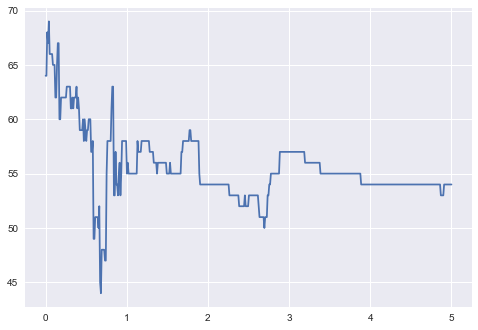

Text(0,0.5,'Accuracy')

In [139]:
import matplotlib.pyplot as plt

accuracies_1, lamdas_1, max_accuracy_1, max_accuracy_lamda_1 = compute_accuracy(reward_function_1, expert_optimal_actions_1)

print(max_accuracy_1, max_accuracy_lamda_1)

plt.plot(lamdas_1,accuracies_1)
plt.show()

plt.xlabel("Lambda")
plt.ylabel("Accuracy")


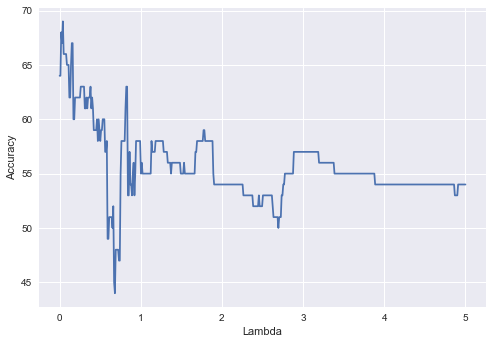

In [142]:
plt.plot(lamdas_1,accuracies_1)

plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.show()

# Question 12 

In [140]:
print(max_accuracy_lamda_1)

0.04008016032064128


In [141]:
print(max_accuracy_1)

69


# Question 13

In [116]:
max_solver_reward_function_1 = compute_solver(max_accuracy_lamda_1, reward_function_1, expert_optimal_actions_1)
solver_reward_function_1 = np.transpose(np.array(max_solver_reward_function_1).reshape(10,10))

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7582e+02  2e+03  2e+00  2e+01  1e+00
 1: -9.8499e+00 -9.6726e+01  4e+02  7e-01  5e+00  1e+00
 2: -1.7875e+01 -7.4703e+01  2e+02  5e-01  3e+00  7e-01
 3: -2.7535e+01 -5.5879e+01  1e+02  2e-01  2e+00  4e-01
 4: -3.2845e+01 -4.5054e+01  5e+01  1e-01  7e-01  1e-01
 5: -3.5570e+01 -4.2496e+01  3e+01  6e-02  4e-01  7e-02
 6: -3.7458e+01 -4.0795e+01  1e+01  3e-02  2e-01  3e-02
 7: -3.8893e+01 -3.9964e+01  4e+00  9e-03  6e-02  8e-03
 8: -3.9087e+01 -3.9748e+01  3e+00  5e-03  4e-02  4e-03
 9: -3.9358e+01 -3.9683e+01  1e+00  3e-03  2e-02  2e-03
10: -3.9472e+01 -3.9655e+01  7e-01  1e-03  1e-02  1e-03
11: -3.9468e+01 -3.9628e+01  7e-01  1e-03  9e-03  8e-04
12: -3.9517e+01 -3.9608e+01  4e-01  7e-04  5e-03  4e-04
13: -3.9523e+01 -3.9610e+01  4e-01  7e-04  5e-03  4e-04
14: -3.9550e+01 -3.9596e+01  2e-01  4e-04  3e-03  2e-04
15: -3.9554e+01 -3.9591e+01  2e-01  3e-04  2e-03  2e-04
16: -3.9564e+01 -3.9585e+01  9e-02  2e-04  1e-03  

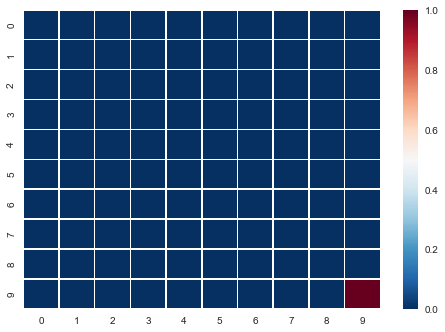

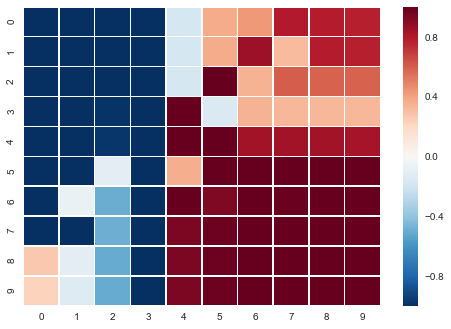

In [117]:
heat_map((reward_function_1))
heat_map(solver_reward_function_1)

# Question 14

In [152]:
agentV1 = Value_Iteration2(transition_prob, 0.8, actions, 0.01, solver_reward_function_1)

#expertV1, expertPi1 = Value_Iteration_with_computation2(transition_prob, 0.8, actions, 0.01, solver_reward)

optimal_values = np.empty([10, 10])
state = 0
for row in range(0,10):
    for column in range(0,10):
        optimal_values[row][column] = round(agentV1[row,column],2)
        #optimal_values[row][column] = agentV1[row,column]
        

optimal_values

#heat_map(agentV1)

array([[-1.57, -0.63,  0.57,  2.11,  3.04,  3.47,  3.85,  3.86,  3.88,
         3.88],
       [-1.41, -0.44,  0.82,  2.42,  3.43,  3.91,  3.6 ,  3.87,  3.87,
         3.88],
       [-0.97,  0.13,  1.55,  3.36,  4.64,  3.72,  4.09,  4.06,  4.08,
         4.07],
       [-0.41,  0.85,  2.47,  4.57,  4.75,  4.87,  4.71,  4.71,  4.71,
         4.71],
       [-0.31,  0.96,  2.57,  4.65,  4.84,  4.91,  4.93,  4.92,  4.92,
         4.93],
       [ 0.13,  1.51,  2.18,  4.11,  4.87,  4.94,  4.96,  4.95,  4.95,
         4.96],
       [ 0.99,  1.47,  2.62,  4.65,  4.82,  4.96,  4.96,  4.96,  4.96,
         4.96],
       [ 1.09,  1.51,  2.59,  4.65,  4.88,  4.96,  4.96,  4.96,  4.96,
         4.96],
       [ 1.14,  1.52,  2.62,  4.65,  4.88,  4.96,  4.96,  4.96,  4.96,
         4.96],
       [ 1.17,  1.54,  2.61,  4.65,  4.88,  4.96,  4.96,  4.96,  4.96,
         4.96]])

In [154]:
pd.DataFrame(optimal_values)

,0,1,2,3,4,5,6,7,8,9
0,-1.57,-0.63,0.57,2.11,3.04,3.47,3.85,3.86,3.88,3.88
1,-1.41,-0.44,0.82,2.42,3.43,3.91,3.60,3.87,3.87,3.88
2,-0.97,0.13,1.55,3.36,4.64,3.72,4.09,4.06,4.08,4.07
3,-0.41,0.85,2.47,4.57,4.75,4.87,4.71,4.71,4.71,4.71
4,-0.31,0.96,2.57,4.65,4.84,4.91,4.93,4.92,4.92,4.93
5,0.13,1.51,2.18,4.11,4.87,4.94,4.96,4.95,4.95,4.96
6,0.99,1.47,2.62,4.65,4.82,4.96,4.96,4.96,4.96,4.96
7,1.09,1.51,2.59,4.65,4.88,4.96,4.96,4.96,4.96,4.96
8,1.14,1.52,2.62,4.65,4.88,4.96,4.96,4.96,4.96,4.96
9,1.17,1.54,2.61,4.65,4.88,4.96,4.96,4.96,4.96,4.96


# Question 15 - Compare the heatmaps from Question 14 and Question 3

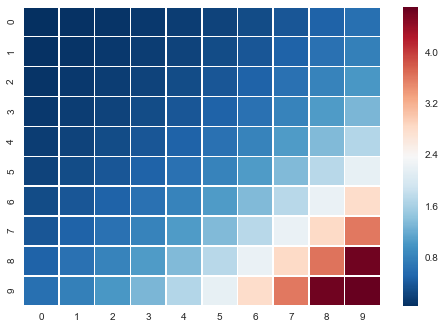

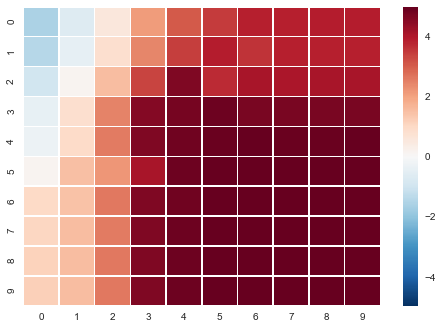

In [156]:
heat_map(expertV1)
heat_map(agentV1)

# Question 16

In [154]:
agentV1, agentPi1 = Value_Iteration_with_computation2(transition_prob, 0.8, actions, 0.01, solver_reward_function_1)

agent_optimal_actions_1 = agentPi1

agent_optimal_arrows_1 = matrix_to_arrows(agent_optimal_actions_1)

In [158]:
pd.DataFrame(agent_optimal_arrows_1)

,0,1,2,3,4,5,6,7,8,9
0,→,→,→,→,→,→,→,→,↑,←
1,→,→,→,→,↓,↓,↓,↑,↑,↑
2,→,→,→,→,↓,↓,↓,↓,↓,↓
3,→,→,→,→,↓,↓,↓,↓,↓,↓
4,→,→,→,→,→,↓,↓,↓,↓,↓
5,→,→,→,→,→,→,↓,←,↓,↓
6,→,→,→,→,→,→,↓,↓,↓,↓
7,↓,→,→,→,→,→,→,→,↓,←
8,←,→,→,→,→,→,↑,→,↑,←
9,↑,→,→,→,→,→,→,→,↑,↑


# Question 17 - Compare results from Q16 and Q5

In [159]:
pd.DataFrame(expert_optimal_arrows_1)

,0,1,2,3,4,5,6,7,8,9
0,↓,→,→,→,→,→,→,→,↓,↓
1,↓,→,→,→,→,→,↓,↓,↓,↓
2,↓,↓,↓,→,→,↓,↓,↓,↓,↓
3,↓,↓,↓,→,↓,↓,↓,↓,↓,↓
4,↓,↓,↓,→,→,↓,↓,↓,↓,↓
5,↓,↓,→,→,→,→,↓,↓,↓,↓
6,↓,→,→,→,→,→,↓,↓,↓,↓
7,↓,→,→,→,→,→,→,→,↓,↓
8,→,→,→,→,→,→,→,→,→,↓
9,→,→,→,→,→,→,→,→,→,→


In [161]:
pd.DataFrame(agent_optimal_arrows_1)

,0,1,2,3,4,5,6,7,8,9
0,→,→,→,→,→,→,→,→,↑,←
1,→,→,→,→,↓,↓,↓,↑,↑,↑
2,→,→,→,→,↓,↓,↓,↓,↓,↓
3,→,→,→,→,↓,↓,↓,↓,↓,↓
4,→,→,→,→,→,↓,↓,↓,↓,↓
5,→,→,→,→,→,→,↓,←,↓,↓
6,→,→,→,→,→,→,↓,↓,↓,↓
7,↓,→,→,→,→,→,→,→,↓,←
8,←,→,→,→,→,→,↑,→,↑,←
9,↑,→,→,→,→,→,→,→,↑,↑


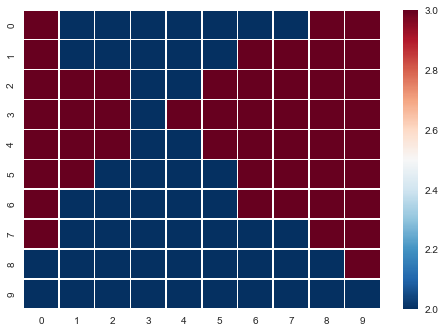

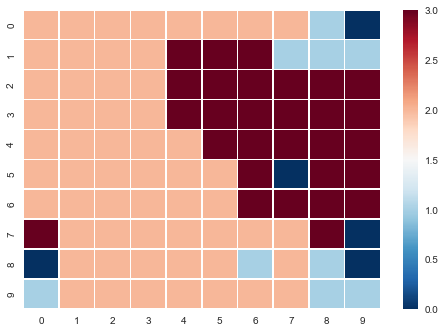

In [155]:
heat_map(expert_optimal_actions_1)
heat_map(agent_optimal_actions_1)

# Question 18 - Reward Function 2

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  2.3351e+01 -2.1160e+04  2e+04  2e-02  2e+01  2e+00
 2:  3.8552e+01 -1.5674e+04  2e+04  1e-02  1e+01  3e+00
 3: -4.8809e+01 -6.8138e+03  8e+03  5e-03  5e+00  3e+00
 4: -3.8686e+02 -4.3152e+03  6e+03  3e-03  3e+00  3e+00
 5: -1.6886e+03 -5.4402e+03  9e+03  3e-03  3e+00  5e+00
 6: -2.2267e+03 -5.9767e+03  1e+04  3e-03  3e+00  6e+00
 7: -3.3361e+03 -5.7366e+03  8e+03  2e-03  2e+00  5e+00
 8: -4.2343e+03 -5.7148e+03  6e+03  1e-03  1e+00  4e+00
 9: -4.2886e+03 -5.4875e+03  5e+03  1e-03  9e-01  4e+00
10: -5.0307e+03 -5.4449e+03  2e+03  3e-04  3e-01  1e+00
11: -5.2021e+03 -5.4500e+03  1e+03  2e-04  2e-01  1e+00
12: -5.2737e+03 -5.4499e+03  9e+02  1e-04  1e-01  8e-01
13: -5.3924e+03 -5.4841e+03  5e+02  7e-05  7e-02  4e-01
14: -5.4083e+03 -5.4865e+03  4e+02  6e-05  6e-02  4e-01
15: -5.4938e+03 -5.5130e+03  1e+02  2e-05  1e-02  9e-02
16: -5.5095e+03 -5.5163e+03  3e+01  5e-06  5e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.0416e+01 -2.1097e+04  2e+04  2e-02  2e+01  2e+00
 2:  6.0236e+01 -1.5568e+04  2e+04  1e-02  1e+01  3e+00
 3: -7.7599e+00 -6.7365e+03  8e+03  5e-03  5e+00  3e+00
 4: -2.9549e+02 -3.8813e+03  5e+03  3e-03  3e+00  2e+00
 5: -1.4788e+03 -5.2056e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.9192e+03 -5.6218e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.8743e+03 -5.3253e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.7228e+03 -5.2104e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.9591e+03 -4.9926e+03  4e+03  8e-04  7e-01  3e+00
10: -4.5808e+03 -4.9646e+03  2e+03  3e-04  3e-01  1e+00
11: -4.7755e+03 -4.9719e+03  8e+02  2e-04  1e-01  6e-01
12: -4.8503e+03 -4.9854e+03  6e+02  1e-04  1e-01  5e-01
13: -4.9062e+03 -4.9906e+03  4e+02  7e-05  6e-02  3e-01
14: -4.9594e+03 -5.0053e+03  2e+02  4e-05  3e-02  2e-01
15: -4.9975e+03 -5.0186e+03  9e+01  2e-05  2e-02  9e-02
16: -5.0062e+03 -5.0204e+03  6e+01  1e-05  1e-02  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  3.7168e+01 -2.1035e+04  2e+04  2e-02  1e+01  2e+00
 2:  8.0688e+01 -1.5463e+04  2e+04  1e-02  1e+01  3e+00
 3:  2.8442e+01 -6.6400e+03  8e+03  5e-03  5e+00  3e+00
 4: -2.2389e+02 -3.4967e+03  4e+03  3e-03  2e+00  2e+00
 5: -1.2932e+03 -4.9616e+03  8e+03  3e-03  3e+00  4e+00
 6: -1.6599e+03 -5.2787e+03  1e+04  3e-03  3e+00  6e+00
 7: -2.4899e+03 -4.9485e+03  8e+03  2e-03  2e+00  5e+00
 8: -3.2456e+03 -4.7777e+03  6e+03  1e-03  1e+00  4e+00
 9: -3.5742e+03 -4.6421e+03  4e+03  9e-04  8e-01  3e+00
10: -4.1082e+03 -4.5741e+03  2e+03  4e-04  3e-01  1e+00
11: -4.3166e+03 -4.5552e+03  1e+03  2e-04  2e-01  7e-01
12: -4.4220e+03 -4.5496e+03  5e+02  1e-04  9e-02  4e-01
13: -4.4774e+03 -4.5581e+03  3e+02  6e-05  6e-02  3e-01
14: -4.5391e+03 -4.5727e+03  1e+02  3e-05  2e-02  1e-01
15: -4.5520e+03 -4.5739e+03  9e+01  2e-05  2e-02  8e-02
16: -4.5714e+03 -4.5801e+03  4e+01  7e-06  6e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  4.4681e+01 -2.0963e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.0316e+02 -1.5342e+04  2e+04  1e-02  1e+01  3e+00
 3:  6.5704e+01 -6.5076e+03  8e+03  5e-03  5e+00  3e+00
 4: -1.4860e+02 -3.2468e+03  4e+03  2e-03  2e+00  2e+00
 5: -1.1025e+03 -4.5637e+03  8e+03  3e-03  2e+00  4e+00
 6: -1.4104e+03 -4.8100e+03  9e+03  3e-03  2e+00  5e+00
 7: -2.0649e+03 -4.5175e+03  7e+03  2e-03  2e+00  5e+00
 8: -2.7770e+03 -4.2888e+03  5e+03  1e-03  1e+00  3e+00
 9: -3.0569e+03 -4.1766e+03  4e+03  9e-04  8e-01  3e+00
10: -3.5731e+03 -4.0858e+03  2e+03  4e-04  4e-01  2e+00
11: -3.8644e+03 -4.0812e+03  9e+02  2e-04  2e-01  7e-01
12: -3.9873e+03 -4.0829e+03  4e+02  8e-05  7e-02  3e-01
13: -4.0505e+03 -4.0891e+03  2e+02  3e-05  3e-02  1e-01
14: -4.0740e+03 -4.0926e+03  7e+01  1e-05  1e-02  7e-02
15: -4.0916e+03 -4.0970e+03  2e+01  4e-06  4e-03  2e-02
16: -4.0936e+03 -4.0974e+03  1e+01  3e-06  3e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.1830e+01 -2.0891e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.2374e+02 -1.5265e+04  2e+04  1e-02  1e+01  3e+00
 3:  9.8411e+01 -6.3700e+03  8e+03  5e-03  4e+00  3e+00
 4: -8.6289e+01 -3.0997e+03  4e+03  2e-03  2e+00  2e+00
 5: -8.1868e+02 -3.9338e+03  6e+03  2e-03  2e+00  3e+00
 6: -1.4641e+03 -4.0721e+03  7e+03  2e-03  2e+00  4e+00
 7: -1.6951e+03 -3.9972e+03  7e+03  2e-03  2e+00  4e+00
 8: -2.4004e+03 -3.8226e+03  5e+03  1e-03  1e+00  3e+00
 9: -2.8731e+03 -3.7363e+03  3e+03  7e-04  6e-01  2e+00
10: -2.9878e+03 -3.5636e+03  2e+03  5e-04  4e-01  2e+00
11: -3.4013e+03 -3.6169e+03  8e+02  2e-04  2e-01  7e-01
12: -3.5514e+03 -3.6276e+03  3e+02  6e-05  5e-02  3e-01
13: -3.6046e+03 -3.6389e+03  1e+02  3e-05  2e-02  1e-01
14: -3.6329e+03 -3.6442e+03  4e+01  9e-06  8e-03  4e-02
15: -3.6440e+03 -3.6467e+03  1e+01  2e-06  2e-03  1e-02
16: -3.6469e+03 -3.6474e+03  2e+00  4e-07  3e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  5.8645e+01 -2.0820e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.4219e+02 -1.5240e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.2676e+02 -6.2177e+03  8e+03  5e-03  4e+00  2e+00
 4: -3.8441e+01 -2.9649e+03  4e+03  2e-03  2e+00  2e+00
 5: -5.9605e+02 -3.3545e+03  5e+03  2e-03  2e+00  3e+00
 6: -1.1640e+03 -3.4147e+03  5e+03  2e-03  2e+00  3e+00
 7: -1.4742e+03 -3.4248e+03  5e+03  2e-03  1e+00  3e+00
 8: -2.0350e+03 -3.4009e+03  4e+03  1e-03  9e-01  3e+00
 9: -2.3067e+03 -3.2896e+03  3e+03  8e-04  7e-01  2e+00
10: -2.5722e+03 -3.2111e+03  2e+03  5e-04  4e-01  2e+00
11: -2.9082e+03 -3.2008e+03  1e+03  2e-04  2e-01  9e-01
12: -3.0813e+03 -3.2068e+03  5e+02  1e-04  9e-02  4e-01
13: -3.1693e+03 -3.2037e+03  1e+02  3e-05  2e-02  1e-01
14: -3.1950e+03 -3.2099e+03  6e+01  1e-05  1e-02  6e-02
15: -3.2070e+03 -3.2125e+03  2e+01  4e-06  4e-03  2e-02
16: -3.2129e+03 -3.2139e+03  4e+00  8e-07  7e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  6.5150e+01 -2.0749e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.5921e+02 -1.5215e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.5146e+02 -6.0370e+03  7e+03  5e-03  4e+00  2e+00
 4: -1.8468e+00 -2.8312e+03  3e+03  2e-03  2e+00  1e+00
 5: -3.9969e+02 -2.8199e+03  4e+03  2e-03  2e+00  2e+00
 6: -9.5520e+02 -2.8950e+03  4e+03  2e-03  1e+00  2e+00
 7: -1.2598e+03 -2.9638e+03  4e+03  1e-03  1e+00  3e+00
 8: -1.6581e+03 -2.9829e+03  4e+03  1e-03  9e-01  3e+00
 9: -1.8918e+03 -2.8646e+03  3e+03  8e-04  6e-01  2e+00
10: -2.0223e+03 -2.7619e+03  3e+03  6e-04  5e-01  2e+00
11: -2.4789e+03 -2.7575e+03  1e+03  2e-04  2e-01  8e-01
12: -2.6271e+03 -2.7698e+03  5e+02  1e-04  1e-01  5e-01
13: -2.7532e+03 -2.7836e+03  1e+02  2e-05  2e-02  1e-01
14: -2.7738e+03 -2.7870e+03  5e+01  1e-05  9e-03  5e-02
15: -2.7824e+03 -2.7884e+03  2e+01  5e-06  4e-03  2e-02
16: -2.7874e+03 -2.7893e+03  7e+00  2e-06  1e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.1369e+01 -2.0678e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.7497e+02 -1.5188e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.7307e+02 -5.8319e+03  7e+03  5e-03  4e+00  2e+00
 4:  2.9145e+01 -2.6800e+03  3e+03  2e-03  2e+00  1e+00
 5: -2.2653e+02 -2.4103e+03  4e+03  2e-03  1e+00  2e+00
 6: -8.1079e+02 -2.4604e+03  4e+03  1e-03  1e+00  2e+00
 7: -1.0338e+03 -2.5384e+03  4e+03  1e-03  1e+00  2e+00
 8: -1.3228e+03 -2.5841e+03  4e+03  1e-03  8e-01  2e+00
 9: -1.5602e+03 -2.4222e+03  3e+03  7e-04  6e-01  2e+00
10: -1.8866e+03 -2.3954e+03  2e+03  4e-04  3e-01  1e+00
11: -2.0527e+03 -2.3488e+03  1e+03  2e-04  2e-01  9e-01
12: -2.2457e+03 -2.3711e+03  5e+02  1e-04  8e-02  4e-01
13: -2.3314e+03 -2.3772e+03  2e+02  4e-05  3e-02  1e-01
14: -2.3638e+03 -2.3805e+03  6e+01  1e-05  1e-02  6e-02
15: -2.3750e+03 -2.3818e+03  3e+01  5e-06  4e-03  2e-02
16: -2.3796e+03 -2.3825e+03  1e+01  2e-06  2e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  7.7322e+01 -2.0608e+04  2e+04  2e-02  1e+01  2e+00
 2:  1.8960e+02 -1.5162e+04  2e+04  1e-02  1e+01  3e+00
 3:  1.9200e+02 -5.6056e+03  7e+03  5e-03  4e+00  2e+00
 4:  5.5690e+01 -2.5206e+03  3e+03  2e-03  2e+00  1e+00
 5: -1.1741e+02 -2.0733e+03  3e+03  2e-03  1e+00  2e+00
 6: -7.0068e+02 -2.0442e+03  3e+03  1e-03  8e-01  2e+00
 7: -8.4518e+02 -2.0925e+03  3e+03  1e-03  8e-01  2e+00
 8: -1.0487e+03 -2.1738e+03  3e+03  9e-04  7e-01  2e+00
 9: -1.1652e+03 -2.0723e+03  3e+03  7e-04  6e-01  2e+00
10: -1.4964e+03 -2.0092e+03  2e+03  4e-04  3e-01  1e+00
11: -1.6120e+03 -1.9896e+03  1e+03  3e-04  2e-01  1e+00
12: -1.8201e+03 -1.9863e+03  6e+02  1e-04  1e-01  5e-01
13: -1.9385e+03 -1.9916e+03  2e+02  4e-05  3e-02  2e-01
14: -1.9770e+03 -1.9983e+03  8e+01  2e-05  1e-02  8e-02
15: -1.9934e+03 -2.0015e+03  3e+01  7e-06  5e-03  3e-02
16: -2.0007e+03 -2.0028e+03  7e+00  2e-06  1e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.3028e+01 -2.0538e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.0320e+02 -1.5134e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.0857e+02 -5.3606e+03  6e+03  4e-03  3e+00  2e+00
 4:  7.7999e+01 -2.3553e+03  3e+03  2e-03  1e+00  1e+00
 5: -4.2081e+01 -1.7699e+03  3e+03  1e-03  1e+00  1e+00
 6: -5.6503e+02 -1.6318e+03  2e+03  9e-04  7e-01  1e+00
 7: -7.1114e+02 -1.6917e+03  2e+03  8e-04  6e-01  2e+00
 8: -8.2265e+02 -1.7516e+03  3e+03  7e-04  6e-01  2e+00
 9: -9.2661e+02 -1.7035e+03  2e+03  6e-04  5e-01  2e+00
10: -1.1425e+03 -1.6244e+03  2e+03  4e-04  3e-01  1e+00
11: -1.3465e+03 -1.6347e+03  1e+03  2e-04  2e-01  8e-01
12: -1.4213e+03 -1.6303e+03  7e+02  2e-04  1e-01  6e-01
13: -1.5658e+03 -1.6390e+03  3e+02  6e-05  4e-02  2e-01
14: -1.5976e+03 -1.6387e+03  1e+02  3e-05  3e-02  1e-01
15: -1.6268e+03 -1.6435e+03  6e+01  1e-05  1e-02  6e-02
16: -1.6399e+03 -1.6457e+03  2e+01  5e-06  4e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  8.7735e+01 -2.0478e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.1413e+02 -1.5110e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.2108e+02 -5.1371e+03  6e+03  4e-03  3e+00  2e+00
 4:  9.4124e+01 -2.2085e+03  3e+03  2e-03  1e+00  1e+00
 5:  4.2182e+00 -1.5247e+03  2e+03  1e-03  9e-01  1e+00
 6: -3.9115e+02 -1.3605e+03  2e+03  8e-04  6e-01  1e+00
 7: -5.7658e+02 -1.4457e+03  2e+03  7e-04  5e-01  1e+00
 8: -6.7885e+02 -1.4401e+03  2e+03  6e-04  5e-01  1e+00
 9: -7.9188e+02 -1.4287e+03  2e+03  5e-04  4e-01  1e+00
10: -8.9164e+02 -1.3699e+03  1e+03  4e-04  3e-01  1e+00
11: -1.0239e+03 -1.3216e+03  1e+03  2e-04  2e-01  8e-01
12: -1.1681e+03 -1.3340e+03  6e+02  1e-04  1e-01  5e-01
13: -1.2156e+03 -1.3343e+03  4e+02  1e-04  7e-02  4e-01
14: -1.3093e+03 -1.3450e+03  1e+02  3e-05  2e-02  1e-01
15: -1.3270e+03 -1.3481e+03  7e+01  2e-05  1e-02  7e-02
16: -1.3431e+03 -1.3508e+03  3e+01  6e-06  5e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.2284e+01 -2.0418e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.2443e+02 -1.5085e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.3217e+02 -4.9025e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.0770e+02 -2.0565e+03  3e+03  2e-03  1e+00  1e+00
 5:  3.7658e+01 -1.2874e+03  2e+03  1e-03  8e-01  1e+00
 6: -2.4826e+02 -1.1634e+03  2e+03  7e-04  5e-01  1e+00
 7: -4.3973e+02 -1.2320e+03  2e+03  6e-04  5e-01  1e+00
 8: -5.2409e+02 -1.2274e+03  2e+03  6e-04  4e-01  1e+00
 9: -6.9168e+02 -1.1699e+03  1e+03  4e-04  3e-01  1e+00
10: -7.6347e+02 -1.0869e+03  1e+03  3e-04  2e-01  8e-01
11: -8.7772e+02 -1.0593e+03  6e+02  1e-04  1e-01  5e-01
12: -9.8962e+02 -1.0587e+03  2e+02  6e-05  4e-02  2e-01
13: -1.0294e+03 -1.0646e+03  1e+02  3e-05  2e-02  1e-01
14: -1.0303e+03 -1.0640e+03  1e+02  3e-05  2e-02  1e-01
15: -1.0547e+03 -1.0663e+03  4e+01  9e-06  7e-03  4e-02
16: -1.0644e+03 -1.0671e+03  9e+00  2e-06  2e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  9.7402e+01 -2.0348e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.3573e+02 -1.5056e+04  2e+04  1e-02  9e+00  3e+00
 3:  2.4715e+02 -4.7186e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.2160e+02 -1.9009e+03  2e+03  2e-03  1e+00  1e+00
 5:  6.6032e+01 -1.0302e+03  1e+03  9e-04  6e-01  9e-01
 6: -9.3664e+01 -9.6134e+02  2e+03  7e-04  5e-01  1e+00
 7: -2.6066e+02 -9.7603e+02  2e+03  6e-04  4e-01  1e+00
 8: -2.7588e+02 -9.4015e+02  2e+03  5e-04  4e-01  1e+00
 9: -4.4994e+02 -8.7274e+02  1e+03  3e-04  2e-01  9e-01
10: -5.5177e+02 -8.3146e+02  8e+02  2e-04  2e-01  6e-01
11: -6.2627e+02 -7.8999e+02  5e+02  1e-04  9e-02  4e-01
12: -7.0960e+02 -7.8071e+02  2e+02  6e-05  4e-02  2e-01
13: -7.4317e+02 -7.7634e+02  1e+02  3e-05  2e-02  9e-02
14: -7.6479e+02 -7.7534e+02  3e+01  8e-06  6e-03  3e-02
15: -7.7273e+02 -7.7562e+02  9e+00  2e-06  2e-03  9e-03
16: -7.7467e+02 -7.7565e+02  3e+00  8e-07  5e-04  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  2e+01  1e+00
 1:  1.0233e+02 -2.0279e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.4632e+02 -1.5025e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.6876e+02 -4.8986e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.3364e+02 -1.8359e+03  2e+03  2e-03  1e+00  9e-01
 5:  8.8099e+01 -8.1478e+02  1e+03  7e-04  5e-01  7e-01
 6:  2.9662e+01 -7.3042e+02  1e+03  6e-04  4e-01  1e+00
 7: -1.2953e+02 -7.0008e+02  1e+03  5e-04  3e-01  1e+00
 8: -1.2892e+02 -6.5508e+02  1e+03  4e-04  3e-01  9e-01
 9: -1.5638e+02 -6.4126e+02  1e+03  4e-04  3e-01  9e-01
10: -1.7640e+02 -5.7226e+02  1e+03  3e-04  2e-01  9e-01
11: -3.1244e+02 -5.4639e+02  6e+02  2e-04  1e-01  6e-01
12: -4.4450e+02 -5.2235e+02  2e+02  6e-05  4e-02  2e-01
13: -4.7842e+02 -5.1818e+02  1e+02  3e-05  2e-02  1e-01
14: -4.9948e+02 -5.1520e+02  5e+01  1e-05  9e-03  4e-02
15: -5.0979e+02 -5.1446e+02  1e+01  4e-06  3e-03  1e-02
16: -5.1172e+02 -5.1440e+02  8e+00  2e-06  1e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.0708e+02 -2.0209e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.5626e+02 -1.4994e+04  2e+04  1e-02  8e+00  3e+00
 3:  2.8911e+02 -5.1480e+03  6e+03  4e-03  3e+00  2e+00
 4:  1.4314e+02 -1.7829e+03  2e+03  2e-03  1e+00  9e-01
 5:  1.0099e+02 -6.7621e+02  1e+03  6e-04  4e-01  6e-01
 6:  9.1736e+01 -5.1481e+02  9e+02  5e-04  3e-01  7e-01
 7: -2.0045e+01 -3.7349e+02  7e+02  3e-04  2e-01  6e-01
 8: -8.7038e+01 -3.8839e+02  7e+02  2e-04  2e-01  5e-01
 9: -1.1862e+02 -3.6110e+02  6e+02  2e-04  1e-01  5e-01
10: -1.5665e+02 -3.2817e+02  4e+02  1e-04  9e-02  4e-01
11: -2.2109e+02 -3.0938e+02  2e+02  7e-05  5e-02  2e-01
12: -2.5510e+02 -2.9615e+02  1e+02  3e-05  2e-02  9e-02
13: -2.7061e+02 -2.9188e+02  6e+01  2e-05  1e-02  5e-02
14: -2.7738e+02 -2.9056e+02  3e+01  1e-05  7e-03  3e-02
15: -2.8559e+02 -2.8942e+02  1e+01  3e-06  2e-03  1e-02
16: -2.8677e+02 -2.8929e+02  7e+00  2e-06  1e-03  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1101e+02 -2.0150e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.6430e+02 -1.4967e+04  2e+04  1e-02  8e+00  3e+00
 3:  3.0570e+02 -5.3451e+03  6e+03  5e-03  3e+00  2e+00
 4:  1.5233e+02 -1.7263e+03  2e+03  2e-03  1e+00  8e-01
 5:  1.0453e+02 -5.5070e+02  8e+02  5e-04  3e-01  5e-01
 6:  1.0560e+02 -3.5865e+02  6e+02  4e-04  2e-01  5e-01
 7:  4.4617e+01 -1.8697e+02  4e+02  2e-04  1e-01  3e-01
 8: -1.4671e+01 -1.8080e+02  4e+02  1e-04  8e-02  3e-01
 9: -1.3037e+01 -1.7187e+02  3e+02  1e-04  8e-02  3e-01
10: -3.1702e+01 -1.6124e+02  3e+02  1e-04  7e-02  2e-01
11: -3.9708e+01 -1.5834e+02  3e+02  1e-04  6e-02  2e-01
12: -4.2039e+01 -1.4957e+02  2e+02  9e-05  5e-02  2e-01
13: -6.3596e+01 -1.3993e+02  2e+02  6e-05  4e-02  2e-01
14: -7.0947e+01 -1.3314e+02  1e+02  5e-05  3e-02  1e-01
15: -9.2252e+01 -1.2774e+02  8e+01  3e-05  2e-02  8e-02
16: -9.2307e+01 -1.2767e+02  8e+01  3e-05  2e-02  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.1483e+02 -2.0090e+04  2e+04  2e-02  1e+01  2e+00
 2:  2.7227e+02 -1.4955e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.2192e+02 -5.5318e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.6042e+02 -1.6643e+03  2e+03  1e-03  9e-01  8e-01
 5:  1.0313e+02 -4.4599e+02  6e+02  4e-04  3e-01  4e-01
 6:  9.5968e+01 -2.1247e+02  4e+02  2e-04  2e-01  3e-01
 7:  3.8966e+01 -4.7668e+01  1e+02  7e-05  4e-02  1e-01
 8:  1.5815e+01 -1.7204e+01  4e+01  3e-05  2e-02  5e-02
 9:  1.2551e+01 -1.0665e+01  3e+01  2e-05  1e-02  3e-02
10:  3.4113e+00 -1.7744e+00  6e+00  4e-06  3e-03  6e-03
11:  3.5630e-01 -6.6237e-02  4e-01  3e-07  2e-04  3e-04
12:  3.8400e-03 -7.4493e-04  5e-03  4e-09  2e-06  4e-06
13:  3.8385e-05 -7.4464e-06  5e-05  4e-11  2e-08  4e-08
14:  3.8385e-07 -7.4464e-08  5e-07  4e-13  2e-10  4e-10
15:  3.8385e-09 -7.4464e-10  5e-09  4e-15  6e-11  4e-12
Optimal solution found.
     pcost       dcost    

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2096e+02 -1.9991e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.8778e+02 -1.5063e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.5087e+02 -5.8500e+03  7e+03  5e-03  3e+00  2e+00
 4:  1.7269e+02 -1.5562e+03  2e+03  1e-03  8e-01  7e-01
 5:  9.2748e+01 -2.9436e+02  4e+02  3e-04  2e-01  3e-01
 6:  4.3142e+01 -3.7118e+01  9e+01  6e-05  4e-02  8e-02
 7:  4.6424e+00 -1.1724e+00  6e+00  5e-06  3e-03  6e-03
 8:  4.9208e-02 -1.2348e-02  6e-02  5e-08  3e-05  6e-05
 9:  4.9201e-04 -1.2346e-04  6e-04  5e-10  3e-07  6e-07
10:  4.9201e-06 -1.2346e-06  6e-06  5e-12  3e-09  6e-09
11:  4.9201e-08 -1.2346e-08  6e-08  5e-14  3e-11  6e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2155e+02 -1.9981e+04  2e+04  2e-02  9e+00  2e+00
 2:  2.8929e+02 -1.5073e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.5368e+02 -5.8799e+03 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2737e+02 -1.9883e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.0389e+02 -1.5171e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.8094e+02 -6.1607e+03  8e+03  5e-03  3e+00  2e+00
 4:  1.8318e+02 -1.4184e+03  2e+03  1e-03  7e-01  7e-01
 5:  8.1227e+01 -2.5575e+02  4e+02  3e-04  1e-01  2e-01
 6:  1.7697e+01 -5.3264e+00  2e+01  2e-05  1e-02  2e-02
 7:  2.0622e-01 -5.9687e-02  3e-01  2e-07  1e-04  3e-04
 8:  2.0616e-03 -5.9670e-04  3e-03  2e-09  1e-06  3e-06
 9:  2.0616e-05 -5.9670e-06  3e-05  2e-11  1e-08  3e-08
10:  2.0616e-07 -5.9670e-08  3e-07  2e-13  1e-10  3e-10
11:  2.0616e-09 -5.9670e-10  3e-09  2e-15  3e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.2793e+02 -1.9873e+04  2e+04  2e-02  9e+00  2e+00
 2:  3.0530e+02 -1.5181e+04  2e+04  1e-02  7e+00  3e+00
 3:  3.8359e+02 -6.1871e+03 

11:  1.3829e-09 -3.2589e-10  2e-09  1e-15  2e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3376e+02 -1.9779e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.2016e+02 -1.5274e+04  2e+04  1e-02  7e+00  3e+00
 3:  4.1196e+02 -6.4746e+03  8e+03  6e-03  3e+00  2e+00
 4:  1.9153e+02 -1.2498e+03  2e+03  1e-03  6e-01  6e-01
 5:  6.8101e+01 -2.2731e+02  3e+02  2e-04  1e-01  1e-01
 6:  1.3233e+01 -3.1128e+00  2e+01  1e-05  7e-03  2e-02
 7:  1.3549e-01 -3.1829e-02  2e-01  1e-07  7e-05  2e-04
 8:  1.3548e-03 -3.1825e-04  2e-03  1e-09  7e-07  2e-06
 9:  1.3548e-05 -3.1825e-06  2e-05  1e-11  7e-09  2e-08
10:  1.3548e-07 -3.1825e-08  2e-07  1e-13  7e-11  2e-10
11:  1.3548e-09 -3.1825e-10  2e-09  1e-15  2e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3421e+02 -1.9774e+04  2e+04  2e-02  8e+00  2e+00
 2: 

 9:  8.2646e-06 -2.4193e-06  1e-05  9e-12  4e-09  1e-08
10:  8.2646e-08 -2.4193e-08  1e-07  9e-14  4e-11  1e-10
11:  8.2646e-10 -2.4193e-10  1e-09  9e-16  2e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.3862e+02 -1.9725e+04  2e+04  2e-02  8e+00  2e+00
 2:  3.3362e+02 -1.5347e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.3910e+02 -6.7679e+03  8e+03  6e-03  3e+00  3e+00
 4:  1.9689e+02 -1.0791e+03  1e+03  1e-03  5e-01  5e-01
 5:  6.3076e+01 -1.9730e+02  3e+02  2e-04  1e-01  1e-01
 6:  7.6326e+00 -2.3340e+00  1e+01  8e-06  4e-03  1e-02
 7:  7.6739e-02 -2.3457e-02  1e-01  8e-08  4e-05  1e-04
 8:  7.6735e-04 -2.3456e-04  1e-03  8e-10  4e-07  1e-06
 9:  7.6735e-06 -2.3456e-06  1e-05  8e-12  4e-09  1e-08
10:  7.6735e-08 -2.3456e-08  1e-07  8e-14  4e-11  1e-10
11:  7.6735e-10 -2.3456e-10  1e-09  9e-16  2e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 8:  2.8400e-04 -1.4823e-04  4e-04  3e-10  2e-07  3e-07
 9:  2.8400e-06 -1.4823e-06  4e-06  3e-12  2e-09  3e-09
10:  2.8400e-08 -1.4823e-08  4e-08  3e-14  2e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4363e+02 -1.9663e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.4747e+02 -1.5419e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.6701e+02 -7.0422e+03  9e+03  6e-03  3e+00  3e+00
 4:  1.9981e+02 -8.7539e+02  1e+03  9e-04  4e-01  4e-01
 5:  5.4072e+01 -1.2874e+02  2e+02  1e-04  7e-02  8e-02
 6:  2.5513e+00 -1.4069e+00  4e+00  3e-06  1e-03  3e-03
 7:  2.5500e-02 -1.4060e-02  4e-02  3e-08  1e-05  3e-05
 8:  2.5500e-04 -1.4060e-04  4e-04  3e-10  1e-07  3e-07
 9:  2.5500e-06 -1.4060e-06  4e-06  3e-12  1e-09  3e-09
10:  2.5500e-08 -1.4060e-08  4e-08  3e-14  1e-11  3e-11
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1: 

 6:  6.9015e-01 -6.8231e-01  1e+00  1e-06  5e-04  8e-04
 7:  6.8995e-03 -6.8209e-03  1e-02  1e-08  5e-06  8e-06
 8:  6.8995e-05 -6.8209e-05  1e-04  1e-10  5e-08  8e-08
 9:  6.8995e-07 -6.8209e-07  1e-06  1e-12  5e-10  8e-10
10:  6.8995e-09 -6.8209e-09  1e-08  1e-14  5e-12  8e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  1e+01  1e+00
 1:  1.4836e+02 -1.9598e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.6053e+02 -1.5483e+04  2e+04  1e-02  6e+00  3e+00
 3:  4.9337e+02 -7.2748e+03  9e+03  6e-03  3e+00  3e+00
 4:  1.9987e+02 -6.5670e+02  9e+02  7e-04  3e-01  4e-01
 5:  3.8257e+01 -6.2253e+01  1e+02  8e-05  4e-02  5e-02
 6:  6.1332e-01 -6.2851e-01  1e+00  1e-06  4e-04  7e-04
 7:  6.1316e-03 -6.2833e-03  1e-02  1e-08  4e-06  7e-06
 8:  6.1316e-05 -6.2833e-05  1e-04  1e-10  4e-08  7e-08
 9:  6.1316e-07 -6.2833e-07  1e-06  1e-12  4e-10  7e-10
10:  6.1316e-09 -6.2833e-09  1e-08  1e-14  5e-12  7e-12
Optimal solution found.
  

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5284e+02 -1.9530e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.7286e+02 -1.5540e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.1835e+02 -7.4710e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0747e+02 -6.4945e+02  9e+02  7e-04  3e-01  3e-01
 5:  3.2725e+01 -4.5244e+01  8e+01  6e-05  3e-02  4e-02
 6:  3.9381e-01 -4.5096e-01  9e-01  7e-07  3e-04  5e-04
 7:  3.9374e-03 -4.5088e-03  9e-03  7e-09  3e-06  5e-06
 8:  3.9374e-05 -4.5088e-05  9e-05  7e-11  3e-08  5e-08
 9:  3.9374e-07 -4.5088e-07  9e-07  7e-13  3e-10  5e-10
10:  3.9374e-09 -4.5088e-09  9e-09  7e-15  3e-12  5e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5321e+02 -1.9524e+04  2e+04  2e-02  7e+00  2e+00
 2:  3.7386e+02 -1.5545e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.2038e+02 -7.4859e+03  9e+03  6e-03  3e+00  3e+00
 4:  2.0819e+02 -6.5226e+02 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5745e+02 -1.9454e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8546e+02 -1.5595e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.4404e+02 -7.6479e+03  9e+03  7e-03  3e+00  3e+00
 4:  2.1612e+02 -6.8315e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.8889e+01 -3.3299e+01  6e+01  5e-05  2e-02  3e-02
 6:  3.0741e-01 -3.3065e-01  6e-01  5e-07  2e-04  3e-04
 7:  3.0738e-03 -3.3061e-03  6e-03  5e-09  2e-06  3e-06
 8:  3.0738e-05 -3.3061e-05  6e-05  5e-11  2e-08  3e-08
 9:  3.0738e-07 -3.3061e-07  6e-07  5e-13  2e-10  3e-10
10:  3.0738e-09 -3.3061e-09  6e-09  5e-15  2e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.5779e+02 -1.9448e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.8639e+02 -1.5599e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.4596e+02 -7.6601e+03  9e+03  7e-03  3e+00  3e+00
 4:  2.1672e+02 -6.8548e+02 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.6149e+02 -1.9381e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9643e+02 -1.5640e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.6661e+02 -7.7821e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2277e+02 -7.0842e+02  1e+03  7e-04  3e-01  3e-01
 5:  2.4624e+01 -1.8807e+01  4e+01  3e-05  1e-02  3e-02
 6:  2.4966e-01 -1.8827e-01  4e-01  4e-07  1e-04  3e-04
 7:  2.4964e-03 -1.8825e-03  4e-03  4e-09  1e-06  3e-06
 8:  2.4964e-05 -1.8825e-05  4e-05  4e-11  1e-08  3e-08
 9:  2.4964e-07 -1.8825e-07  4e-07  4e-13  1e-10  3e-10
10:  2.4964e-09 -1.8825e-09  4e-09  4e-15  2e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  9e+00  1e+00
 1:  1.6182e+02 -1.9375e+04  2e+04  2e-02  6e+00  2e+00
 2:  3.9731e+02 -1.5644e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.6844e+02 -7.7921e+03  1e+04  7e-03  3e+00  3e+00
 4:  2.2328e+02 -7.1026e+02 

 5:  2.2484e+01 -1.0605e+01  3e+01  3e-05  1e-02  2e-02
 6:  2.2517e-01 -1.0617e-01  3e-01  3e-07  1e-04  2e-04
 7:  2.2516e-03 -1.0617e-03  3e-03  3e-09  1e-06  2e-06
 8:  2.2516e-05 -1.0617e-05  3e-05  3e-11  1e-08  2e-08
 9:  2.2516e-07 -1.0617e-07  3e-07  3e-13  1e-10  2e-10
10:  2.2516e-09 -1.0617e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6565e+02 -1.9300e+04  2e+04  2e-02  6e+00  2e+00
 2:  4.0765e+02 -1.5683e+04  2e+04  1e-02  5e+00  3e+00
 3:  5.8995e+02 -7.8999e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.2874e+02 -7.2906e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2493e+01 -1.0576e+01  3e+01  3e-05  1e-02  2e-02
 6:  2.2525e-01 -1.0588e-01  3e-01  3e-07  1e-04  2e-04
 7:  2.2523e-03 -1.0587e-03  3e-03  3e-09  1e-06  2e-06
 8:  2.2523e-05 -1.0587e-05  3e-05  3e-11  1e-08  2e-08
 9:  2.2523e-07 -1.0587e-07  3e-07  3e-13  1e-10  2e-10
10:  2.2523e-09 -1.0587e-0

 9:  2.2577e-07 -1.0232e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2577e-09 -1.0232e-09  3e-09  3e-15  2e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6932e+02 -1.9224e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.1743e+02 -1.5717e+04  2e+04  1e-02  5e+00  3e+00
 3:  6.1056e+02 -7.9859e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.3326e+02 -7.4176e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2568e+01 -1.0188e+01  3e+01  3e-05  9e-03  2e-02
 6:  2.2581e-01 -1.0198e-01  3e-01  3e-07  9e-05  2e-04
 7:  2.2579e-03 -1.0197e-03  3e-03  3e-09  9e-07  2e-06
 8:  2.2579e-05 -1.0197e-05  3e-05  3e-11  9e-09  2e-08
 9:  2.2579e-07 -1.0197e-07  3e-07  3e-13  9e-11  2e-10
10:  2.2579e-09 -1.0197e-09  3e-09  3e-15  3e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  8e+00  1e+00
 1:  1.6962e+02 -1.9218e+04  2e+04  2e-02  5e+00  2e+00
 2: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7311e+02 -1.9140e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2744e+02 -1.5749e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.3198e+02 -8.0573e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.3748e+02 -7.5346e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2698e+01 -9.8024e+00  3e+01  3e-05  9e-03  3e-02
 6:  2.2702e-01 -9.8104e-02  3e-01  3e-07  9e-05  3e-04
 7:  2.2701e-03 -9.8098e-04  3e-03  3e-09  9e-07  3e-06
 8:  2.2701e-05 -9.8098e-06  3e-05  3e-11  9e-09  3e-08
 9:  2.2701e-07 -9.8098e-08  3e-07  3e-13  9e-11  3e-10
10:  2.2701e-09 -9.8098e-10  3e-09  3e-15  3e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7340e+02 -1.9133e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.2819e+02 -1.5751e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.3359e+02 -8.0619e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.3781e+02 -7.5394e+02 

 8:  2.2609e-05 -9.3513e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2609e-07 -9.3513e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2609e-09 -9.3513e-10  3e-09  3e-15  2e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.7701e+02 -1.9047e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.3758e+02 -1.5777e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.5406e+02 -8.1115e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4177e+02 -7.5650e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.2601e+01 -9.3096e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.2600e-01 -9.3163e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.2599e-03 -9.3158e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.2599e-05 -9.3158e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.2599e-07 -9.3158e-08  3e-07  3e-13  8e-11  3e-10
10:  2.2599e-09 -9.3158e-10  3e-09  3e-15  3e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  7e+00  1e+00
 1: 

 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.8047e+02 -1.8959e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4643e+02 -1.5799e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.7373e+02 -8.1429e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4724e+02 -7.8419e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.3095e+01 -9.3874e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.3093e-01 -9.3936e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.3091e-03 -9.3931e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.3091e-05 -9.3931e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.3091e-07 -9.3931e-08  3e-07  3e-13  8e-11  3e-10
10:  2.3091e-09 -9.3931e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.8073e+02 -1.8953e+04  2e+04  2e-02  5e+00  2e+00
 2:  4.4709e+02 -1.5800e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.7521e+02 -8.1446e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.4784e+02 -7.8667e+02  1e+03  8e-04  3e-01  3e-01
 5:  2.3121e+01 -9.4053e+0

10:  2.3267e-09 -9.5666e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.8403e+02 -1.8864e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5540e+02 -1.5817e+04  2e+04  1e-02  4e+00  3e+00
 3:  6.9408e+02 -8.1584e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.5521e+02 -8.1390e+02  1e+03  9e-04  2e-01  3e-01
 5:  2.3274e+01 -9.5708e+00  3e+01  3e-05  8e-03  3e-02
 6:  2.3268e-01 -9.5754e-02  3e-01  3e-07  8e-05  3e-04
 7:  2.3266e-03 -9.5749e-04  3e-03  3e-09  8e-07  3e-06
 8:  2.3266e-05 -9.5749e-06  3e-05  3e-11  8e-09  3e-08
 9:  2.3266e-07 -9.5749e-08  3e-07  3e-13  8e-11  3e-10
10:  2.3266e-09 -9.5749e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  7e+00  1e+00
 1:  1.8428e+02 -1.8857e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.5601e+02 -1.5818e+04  2e+04  1e-02  4e+00  3e+00
 3: 

 7:  2.3120e-03 -9.6258e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.3120e-05 -9.6258e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.3120e-07 -9.6258e-08  3e-07  3e-13  7e-11  3e-10
10:  2.3120e-09 -9.6258e-10  3e-09  3e-15  9e-13  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.8720e+02 -1.8773e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.6321e+02 -1.5829e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.1226e+02 -8.1574e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6167e+02 -8.3265e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.3108e+01 -9.6244e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.3098e-01 -9.6267e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.3097e-03 -9.6263e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.3097e-05 -9.6263e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.3097e-07 -9.6263e-08  3e-07  3e-13  7e-11  3e-10
10:  2.3097e-09 -9.6263e-10  3e-09  3e-15  3e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9025e+02 -1.8682e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7057e+02 -1.5838e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.2978e+02 -8.1428e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6727e+02 -8.4375e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.2663e+01 -9.5853e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.2648e-01 -9.5849e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.2647e-03 -9.5845e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.2647e-05 -9.5845e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.2647e-07 -9.5845e-08  3e-07  3e-13  7e-11  3e-10
10:  2.2647e-09 -9.5845e-10  3e-09  3e-15  2e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9048e+02 -1.8675e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7112e+02 -1.5838e+04  2e+04  1e-02  4e+00  3e+00
 3:  7.3111e+02 -8.1411e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.6767e+02 -8.4431e+02 

 3:  7.4670e+02 -8.1156e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7203e+02 -8.4798e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1978e+01 -9.4695e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.1959e-01 -9.4666e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.1958e-03 -9.4662e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.1958e-05 -9.4662e-06  3e-05  3e-11  7e-09  3e-08
 9:  2.1958e-07 -9.4662e-08  3e-07  3e-13  7e-11  3e-10
10:  2.1958e-09 -9.4662e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9340e+02 -1.8583e+04  2e+04  2e-02  4e+00  2e+00
 2:  4.7801e+02 -1.5843e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.4797e+02 -8.1130e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7236e+02 -8.4805e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1916e+01 -9.4578e+00  3e+01  3e-05  7e-03  3e-02
 6:  2.1897e-01 -9.4548e-02  3e-01  3e-07  7e-05  3e-04
 7:  2.1896e-03 -9.4544e-04  3e-03  3e-09  7e-07  3e-06
 8:  2.1896e-05 -9.4544e-0

 5:  2.1091e+01 -9.2909e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.1069e-01 -9.2859e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.1068e-03 -9.2856e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.1068e-05 -9.2856e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.1068e-07 -9.2856e-08  3e-07  2e-13  6e-11  3e-10
10:  2.1068e-09 -9.2856e-10  3e-09  3e-15  1e-12  3e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  6e+00  1e+00
 1:  1.9621e+02 -1.8490e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.8449e+02 -1.5844e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.6426e+02 -8.0735e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7624e+02 -8.4569e+02  1e+03  9e-04  2e-01  4e-01
 5:  2.1015e+01 -9.2750e+00  3e+01  2e-05  6e-03  3e-02
 6:  2.0993e-01 -9.2698e-02  3e-01  2e-07  6e-05  3e-04
 7:  2.0993e-03 -9.2694e-04  3e-03  2e-09  6e-07  3e-06
 8:  2.0992e-05 -9.2694e-06  3e-05  2e-11  6e-09  3e-08
 9:  2.0992e-07 -9.2694e-08  3e-07  2e-13  6e-11  3e-10
10:  2.0992e-09 -9.2694e-1

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9892e+02 -1.8395e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.9057e+02 -1.5842e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.7999e+02 -8.0232e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7933e+02 -8.3791e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.9956e+01 -9.0490e+00  3e+01  2e-05  6e-03  2e-02
 6:  1.9933e-01 -9.0422e-02  3e-01  2e-07  6e-05  2e-04
 7:  1.9932e-03 -9.0419e-04  3e-03  2e-09  6e-07  2e-06
 8:  1.9932e-05 -9.0419e-06  3e-05  2e-11  6e-09  2e-08
 9:  1.9932e-07 -9.0419e-08  3e-07  2e-13  6e-11  2e-10
10:  1.9932e-09 -9.0419e-10  3e-09  2e-15  6e-13  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  1.9913e+02 -1.8388e+04  2e+04  1e-02  4e+00  2e+00
 2:  4.9102e+02 -1.5842e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.8117e+02 -8.0189e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.7954e+02 -8.3710e+02 

 3:  7.9478e+02 -7.9738e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8173e+02 -8.2542e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8783e+01 -8.8162e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8761e-01 -8.8086e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8760e-03 -8.8083e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8760e-05 -8.8083e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8760e-07 -8.8083e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8760e-09 -8.8083e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0174e+02 -1.8293e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9670e+02 -1.5836e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9547e+02 -7.9807e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8198e+02 -8.2439e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8688e+01 -8.7976e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8666e-01 -8.7900e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8665e-03 -8.7897e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8665e-05 -8.7897e-0

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0426e+02 -1.8198e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0202e+02 -1.5828e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0427e+02 -8.0604e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8480e+02 -8.0962e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.7441e+01 -8.5465e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.7421e-01 -8.5387e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.7421e-03 -8.5384e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.7421e-05 -8.5384e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.7421e-07 -8.5384e-08  3e-07  2e-13  5e-11  2e-10
10:  1.7421e-09 -8.5384e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0445e+02 -1.8190e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0242e+02 -1.5827e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0493e+02 -8.0658e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8499e+02 -8.0839e+02 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0688e+02 -1.8094e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0738e+02 -1.5815e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1338e+02 -8.1253e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8717e+02 -7.9120e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.6104e+01 -8.2592e+00  3e+01  2e-05  4e-03  2e-02
 6:  1.6085e-01 -8.2514e-02  3e-01  2e-07  4e-05  2e-04
 7:  1.6085e-03 -8.2512e-04  3e-03  2e-09  4e-07  2e-06
 8:  1.6085e-05 -8.2511e-06  3e-05  2e-11  4e-09  2e-08
 9:  1.6085e-07 -8.2511e-08  3e-07  2e-13  4e-11  2e-10
10:  1.6085e-09 -8.2511e-10  3e-09  2e-15  8e-13  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0706e+02 -1.8087e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0774e+02 -1.5814e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1402e+02 -8.1292e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8731e+02 -7.8980e+02 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0940e+02 -1.7990e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.1235e+02 -1.5800e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.2212e+02 -8.1708e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8886e+02 -7.7061e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.4793e+01 -7.9594e+00  2e+01  2e-05  4e-03  2e-02
 6:  1.4777e-01 -7.9518e-02  2e-01  2e-07  4e-05  2e-04
 7:  1.4776e-03 -7.9516e-04  2e-03  2e-09  4e-07  2e-06
 8:  1.4776e-05 -7.9516e-06  2e-05  2e-11  4e-09  2e-08
 9:  1.4776e-07 -7.9516e-08  2e-07  2e-13  4e-11  2e-10
10:  1.4776e-09 -7.9516e-10  2e-09  2e-15  9e-13  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0958e+02 -1.7982e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.1198e+02 -1.5804e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.2136e+02 -8.1704e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8858e+02 -7.6726e+02 

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.1150e+02 -1.7900e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0758e+02 -1.5845e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1303e+02 -8.1396e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8487e+02 -7.2803e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.2929e+01 -7.4345e+00  2e+01  2e-05  3e-03  2e-02
 6:  1.2916e-01 -7.4275e-02  2e-01  2e-07  3e-05  2e-04
 7:  1.2915e-03 -7.4274e-04  2e-03  2e-09  3e-07  2e-06
 8:  1.2915e-05 -7.4274e-06  2e-05  2e-11  3e-09  2e-08
 9:  1.2915e-07 -7.4274e-08  2e-07  2e-13  3e-11  2e-10
10:  1.2915e-09 -7.4274e-10  2e-09  2e-15  9e-13  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.1167e+02 -1.7892e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0721e+02 -1.5848e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.1237e+02 -8.1348e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8452e+02 -7.2439e+02 

 7:  1.1596e-03 -7.2551e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1596e-05 -7.2551e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1596e-07 -7.2551e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1596e-09 -7.2551e-10  2e-09  2e-15  1e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1386e+02 -1.7794e+04  2e+04  1e-02  3e+00  2e+00
 2:  5.0282e+02 -1.5881e+04  2e+04  1e-02  3e+00  3e+00
 3:  8.0484e+02 -8.0493e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8225e+02 -7.1418e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.1535e+01 -7.2666e+00  2e+01  2e-05  3e-03  1e-02
 6:  1.1525e-01 -7.2602e-02  2e-01  2e-07  3e-05  1e-04
 7:  1.1524e-03 -7.2601e-04  2e-03  2e-09  3e-07  1e-06
 8:  1.1524e-05 -7.2601e-06  2e-05  2e-11  3e-09  1e-08
 9:  1.1524e-07 -7.2601e-08  2e-07  2e-13  3e-11  1e-10
10:  1.1524e-09 -7.2601e-10  2e-09  2e-15  5e-13  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 7:  1.0560e-03 -7.2459e-04  2e-03  1e-09  3e-07  1e-06
 8:  1.0560e-05 -7.2459e-06  2e-05  1e-11  3e-09  1e-08
 9:  1.0560e-07 -7.2459e-08  2e-07  1e-13  3e-11  1e-10
10:  1.0560e-09 -7.2459e-10  2e-09  1e-15  7e-13  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1615e+02 -1.7688e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9886e+02 -1.5902e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9857e+02 -7.9185e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.8007e+02 -7.1269e+02  1e+03  8e-04  2e-01  4e-01
 5:  1.0492e+01 -7.2456e+00  2e+01  1e-05  3e-03  1e-02
 6:  1.0483e-01 -7.2395e-02  2e-01  1e-07  3e-05  1e-04
 7:  1.0483e-03 -7.2394e-04  2e-03  1e-09  3e-07  1e-06
 8:  1.0483e-05 -7.2394e-06  2e-05  1e-11  3e-09  1e-08
 9:  1.0483e-07 -7.2394e-08  2e-07  1e-13  3e-11  1e-10
10:  1.0483e-09 -7.2394e-10  2e-09  1e-15  5e-13  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 2:  4.9259e+02 -1.5937e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8878e+02 -7.7407e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.7699e+02 -7.0754e+02  1e+03  8e-04  1e-01  4e-01
 5:  9.4742e+00 -7.1865e+00  2e+01  1e-05  3e-03  1e-02
 6:  9.4669e-02 -7.1809e-02  2e-01  1e-07  3e-05  1e-04
 7:  9.4668e-04 -7.1808e-04  2e-03  1e-09  3e-07  1e-06
 8:  9.4668e-06 -7.1808e-06  2e-05  1e-11  3e-09  1e-08
 9:  9.4668e-08 -7.1808e-08  2e-07  1e-13  3e-11  1e-10
10:  9.4668e-10 -7.1808e-10  2e-09  2e-15  1e-12  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1732e+02 -1.7630e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9206e+02 -1.5940e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8831e+02 -7.7306e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.7696e+02 -7.0799e+02  1e+03  8e-04  1e-01  4e-01
 5:  9.4188e+00 -7.1912e+00  2e+01  1e-05  3e-03  1e-02
 6:  9.4115e-02 -7.1856e-02  2e-01  1e-07  2e-05  1e-04
 7:  9.4114e-04 -7.1855e-0

 7:  8.7325e-04 -7.1808e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.7325e-06 -7.1808e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.7325e-08 -7.1808e-08  2e-07  1e-13  2e-11  1e-10
10:  8.7325e-10 -7.1808e-10  2e-09  1e-15  5e-13  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1798e+02 -1.7594e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8581e+02 -1.5973e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8347e+02 -7.5868e+03  1e+04  7e-03  1e+00  3e+00
 4:  2.7613e+02 -7.0781e+02  1e+03  8e-04  1e-01  4e-01
 5:  8.6817e+00 -7.1813e+00  2e+01  1e-05  2e-03  1e-02
 6:  8.6755e-02 -7.1761e-02  2e-01  1e-07  2e-05  1e-04
 7:  8.6754e-04 -7.1760e-04  2e-03  1e-09  2e-07  1e-06
 8:  8.6754e-06 -7.1760e-06  2e-05  1e-11  2e-09  1e-08
 9:  8.6754e-08 -7.1760e-08  2e-07  1e-13  2e-11  1e-10
10:  8.6754e-10 -7.1760e-10  2e-09  1e-15  7e-13  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0: 

 4:  2.7464e+02 -6.9888e+02  1e+03  8e-04  1e-01  4e-01
 5:  7.9447e+00 -7.0709e+00  2e+01  1e-05  2e-03  9e-03
 6:  7.9395e-02 -7.0660e-02  2e-01  1e-07  2e-05  9e-05
 7:  7.9394e-04 -7.0660e-04  2e-03  1e-09  2e-07  9e-07
 8:  7.9394e-06 -7.0660e-06  2e-05  1e-11  2e-09  9e-09
 9:  7.9394e-08 -7.0660e-08  2e-07  1e-13  2e-11  9e-11
10:  7.9394e-10 -7.0660e-10  2e-09  1e-15  1e-12  9e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  4e+00  1e+00
 1:  2.1861e+02 -1.7555e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.8031e+02 -1.5997e+04  2e+04  1e-02  2e+00  3e+00
 3:  7.8027e+02 -7.4132e+03  9e+03  7e-03  1e+00  3e+00
 4:  2.7451e+02 -6.9791e+02  1e+03  8e-04  1e-01  4e-01
 5:  7.8889e+00 -7.0592e+00  2e+01  1e-05  2e-03  9e-03
 6:  7.8838e-02 -7.0544e-02  2e-01  1e-07  2e-05  9e-05
 7:  7.8837e-04 -7.0544e-04  2e-03  1e-09  2e-07  9e-07
 8:  7.8837e-06 -7.0544e-06  2e-05  1e-11  2e-09  9e-09
 9:  7.8837e-08 -7.0544e-0

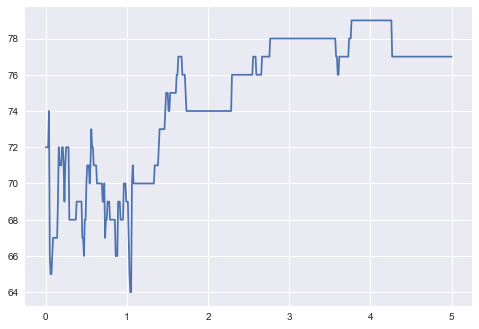

In [144]:
import matplotlib.pyplot as plt

accuracies_2, lamdas_2, max_accuracy_2, max_accuracy_lamda_2 = compute_accuracy(reward_function_2, expert_optimal_actions_2)

print(max_accuracy_2, max_accuracy_lamda_2)

plt.plot(lamdas_2,accuracies_2)
plt.show()

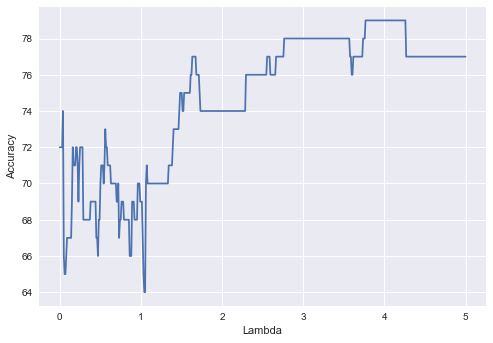

In [145]:
plt.plot(lamdas_2,accuracies_2)

plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.show()

# Question 19

In [146]:
print(max_accuracy_lamda_2)

3.7675350701402803


In [147]:
print(max_accuracy_2)

79


# Question 20

In [80]:
max_solver_reward_function_2 = compute_solver(max_accuracy_lamda_2, reward_function_2, expert_optimal_actions_2)
solver_reward_function_2 = np.transpose(np.array(max_solver_reward_function_2).reshape(10,10))

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -2.7951e+04  3e+04  2e-02  5e+00  1e+00
 1:  2.0233e+02 -1.8271e+04  2e+04  1e-02  3e+00  2e+00
 2:  4.9796e+02 -1.5834e+04  2e+04  1e-02  3e+00  3e+00
 3:  7.9753e+02 -8.0009e+03  1e+04  7e-03  2e+00  3e+00
 4:  2.8268e+02 -8.2120e+02  1e+03  9e-04  2e-01  4e-01
 5:  1.8401e+01 -8.7413e+00  3e+01  2e-05  5e-03  2e-02
 6:  1.8379e-01 -8.7336e-02  3e-01  2e-07  5e-05  2e-04
 7:  1.8379e-03 -8.7333e-04  3e-03  2e-09  5e-07  2e-06
 8:  1.8379e-05 -8.7333e-06  3e-05  2e-11  5e-09  2e-08
 9:  1.8379e-07 -8.7333e-08  3e-07  2e-13  5e-11  2e-10
10:  1.8379e-09 -8.7333e-10  3e-09  2e-15  1e-12  2e-12
Optimal solution found.


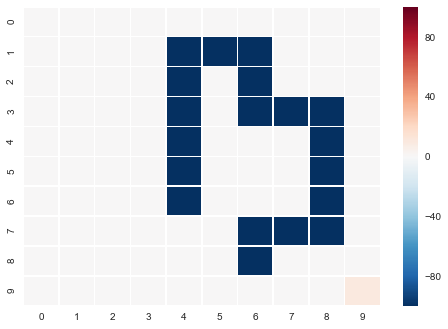

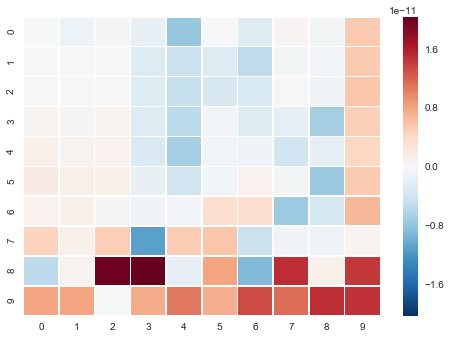

In [90]:
heat_map((reward_function_2))
heat_map(solver_reward_function_2)

# Question 21

In [82]:
agentV2 = Value_Iteration2(transition_prob, 0.8, actions, 0.01, solver_reward_function_2)

optimal_values = np.empty([10, 10])
state = 0
for row in range(0,10):
    for column in range(0,10):
        optimal_values[row][column] = round(agentV2[row,column]*10**11,2)
        

print(optimal_values)

#heat_map(agentV1)

[[-0.01 -0.02 -0.02 -0.07 -0.02 -0.02  0.01  0.02  0.48  0.52]
 [ 0.01 -0.    0.   -0.04 -0.29 -0.02 -0.07  0.02  0.49  0.55]
 [ 0.04  0.03  0.03 -0.01 -0.28 -0.1  -0.03 -0.06  0.51  0.55]
 [ 0.11  0.07  0.07  0.01 -0.11 -0.1  -0.09 -0.03  0.43  0.53]
 [ 0.17  0.12  0.1   0.05 -0.1  -0.09  0.06 -0.06  0.35  0.51]
 [ 0.17  0.17  0.11  0.08 -0.08  0.3   0.31  0.03  0.48  0.63]
 [ 0.45  0.12  0.46 -0.01  0.47  0.53  0.28  0.3   0.59  0.63]
 [ 0.43  0.47  1.83  1.91  0.49  0.77  0.51  1.35  0.1   1.35]
 [ 0.74  1.86  1.9   1.84  1.94  0.66  1.43  1.04  1.47  1.41]
 [ 0.77  0.77  1.89  1.93  1.02  1.3   1.26  1.49  1.46  1.51]]


In [83]:
pd.DataFrame(optimal_values)

,0,1,2,3,4,5,6,7,8,9
0,-0.01,-0.02,-0.02,-0.07,-0.02,-0.02,0.01,0.02,0.48,0.52
1,0.01,-0.00,0.00,-0.04,-0.29,-0.02,-0.07,0.02,0.49,0.55
2,0.04,0.03,0.03,-0.01,-0.28,-0.10,-0.03,-0.06,0.51,0.55
3,0.11,0.07,0.07,0.01,-0.11,-0.10,-0.09,-0.03,0.43,0.53
4,0.17,0.12,0.10,0.05,-0.10,-0.09,0.06,-0.06,0.35,0.51
5,0.17,0.17,0.11,0.08,-0.08,0.30,0.31,0.03,0.48,0.63
6,0.45,0.12,0.46,-0.01,0.47,0.53,0.28,0.30,0.59,0.63
7,0.43,0.47,1.83,1.91,0.49,0.77,0.51,1.35,0.10,1.35
8,0.74,1.86,1.90,1.84,1.94,0.66,1.43,1.04,1.47,1.41
9,0.77,0.77,1.89,1.93,1.02,1.30,1.26,1.49,1.46,1.51


# Question 22

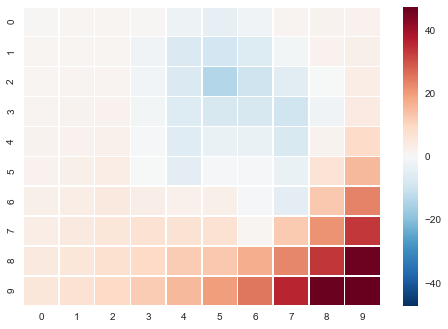

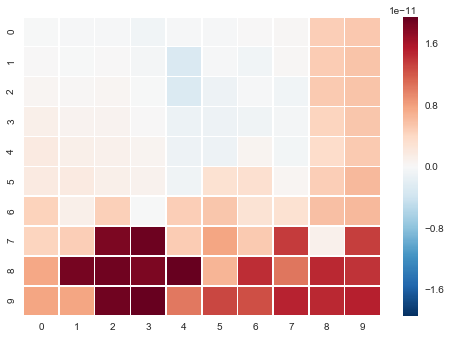

In [84]:
heat_map(expertV2)
heat_map(agentV2)

# Question 23

In [85]:
agentV2, agentPi2 = Value_Iteration_with_computation2(transition_prob, 0.8, actions, 0.01, solver_reward_function_2)

agent_optimal_actions_2 = agentPi2

agent_optimal_arrows_2 = matrix_to_arrows(agent_optimal_actions_2)

In [86]:
pd.DataFrame(agent_optimal_arrows_2)

,0,1,2,3,4,5,6,7,8,9
0,↓,↓,↓,←,→,→,→,→,→,↓
1,↓,↓,↓,←,→,↑,→,→,→,↓
2,↓,↓,↓,←,←,↓,→,→,→,↓
3,↓,↓,↓,←,→,↓,↓,↑,→,↓
4,↓,↓,↓,←,→,↓,↓,→,→,↓
5,↓,←,↓,←,↓,↓,↓,←,→,↓
6,↓,↓,↓,↓,↓,↓,←,↓,→,↓
7,→,→,↓,↓,↓,↓,←,↓,↓,↓
8,→,→,→,↓,←,↓,↓,↓,↓,↓
9,→,↑,↑,→,→,→,→,→,→,→


# Question 24

In [87]:
pd.DataFrame(expert_optimal_arrows_2)

,0,1,2,3,4,5,6,7,8,9
0,↓,↓,↓,←,←,→,→,→,→,↓
1,↓,↓,↓,←,←,↑,→,→,→,↓
2,↓,↓,↓,←,←,↓,→,→,→,↓
3,↓,↓,↓,←,←,↓,↓,↑,→,↓
4,↓,↓,↓,←,←,↓,↓,↓,→,↓
5,↓,↓,↓,←,←,↓,↓,←,→,↓
6,↓,↓,↓,↓,↓,↓,←,←,→,↓
7,↓,↓,↓,↓,↓,↓,←,↓,↓,↓
8,→,→,→,↓,↓,↓,↓,↓,↓,↓
9,→,→,→,→,→,→,→,→,→,→


In [88]:
pd.DataFrame(agent_optimal_arrows_2)

,0,1,2,3,4,5,6,7,8,9
0,↓,↓,↓,←,→,→,→,→,→,↓
1,↓,↓,↓,←,→,↑,→,→,→,↓
2,↓,↓,↓,←,←,↓,→,→,→,↓
3,↓,↓,↓,←,→,↓,↓,↑,→,↓
4,↓,↓,↓,←,→,↓,↓,→,→,↓
5,↓,←,↓,←,↓,↓,↓,←,→,↓
6,↓,↓,↓,↓,↓,↓,←,↓,→,↓
7,→,→,↓,↓,↓,↓,←,↓,↓,↓
8,→,→,→,↓,←,↓,↓,↓,↓,↓
9,→,↑,↑,→,→,→,→,→,→,→


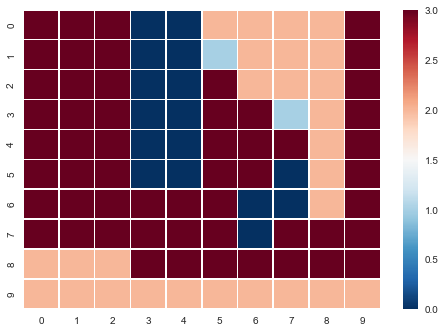

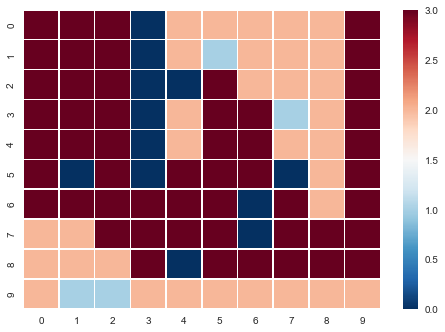

In [89]:
heat_map(expert_optimal_actions_2)
heat_map(agent_optimal_actions_2)

# End of Notebook